*******************************************************************************************************
*******************************************************************************************************
# PROJECT (code)

**A comparison and application of machine learning techniques towards the analysis of UCI's Breast Cancer (Coimbra) dataset.**

In [1]:
# Python libraries for data pre-processing
import pandas as pd
import numpy as np

# Python libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df5 = pd.read_csv('BreastCancer_Coimbra.csv')

# Data Preprocessing

In [3]:
df5.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df5["Classification"].replace((1,2),(0,1),inplace=True)
df5["Classification"].head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Classification, Length: 116, dtype: int64>

In [5]:
df5.head(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0


In [6]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
# Checking for Missing Values MV: 
df5.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [8]:
# Checking for duplicated rows
duplicates = df5[df5.duplicated()]
print("Number of duplicate rows :: ", duplicates.shape)

Number of duplicate rows ::  (0, 10)


In [9]:
df5.shape

(116, 10)

# Exploratory Data Analysis (EDA)

In [10]:
# Converting categorical attributes to text for better data exploratory and visualization

df5['Classification'][df5['Classification'] == 0] = 'Healthy'
df5['Classification'][df5['Classification'] == 1] = 'UnHealthy'

In [11]:
# Data.head visualization of modification to categorical attributes
df5.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Healthy
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Healthy
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Healthy
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Healthy
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Healthy


In [12]:
df5.shape

(116, 10)

**Distribution of Patients ('Classification' Attribute)**

In [13]:
df5.groupby('Classification').size()


Classification
Healthy      52
UnHealthy    64
dtype: int64

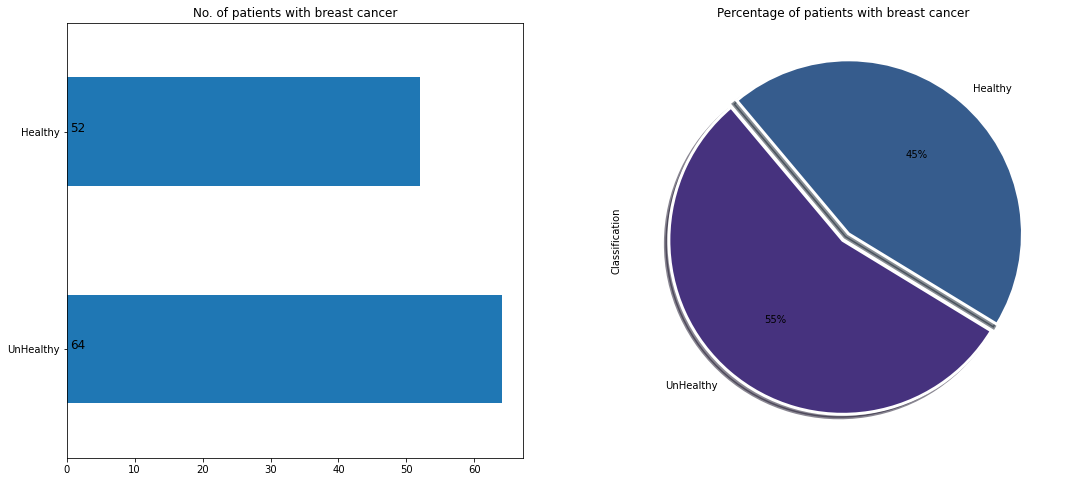

In [14]:
# plotting the distribution of 'Classification' attribute along those with and without heart diseases
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,8))

ax1 = df5["Classification"].value_counts().plot(kind="barh", ax =ax1)
for i,j in enumerate(df5["Classification"].value_counts().values):
    ax1.text(.5,i,j,fontsize=12)
ax1.set(title = 'No. of patients with breast cancer')


ax2 = df5['Classification'].value_counts().plot.pie(colors = sns.color_palette("viridis"), 
                   autopct = "%1.0f%%", startangle = 130, wedgeprops={"linewidth":3,"edgecolor":"w"},
                                               explode=[.0,.1/2], shadow=True);
ax2.set(title = 'Percentage of patients with breast cancer')

plt.show()

# Analysis of Numerical Attributes

In [15]:
# A discription of numberical attributes
df5.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


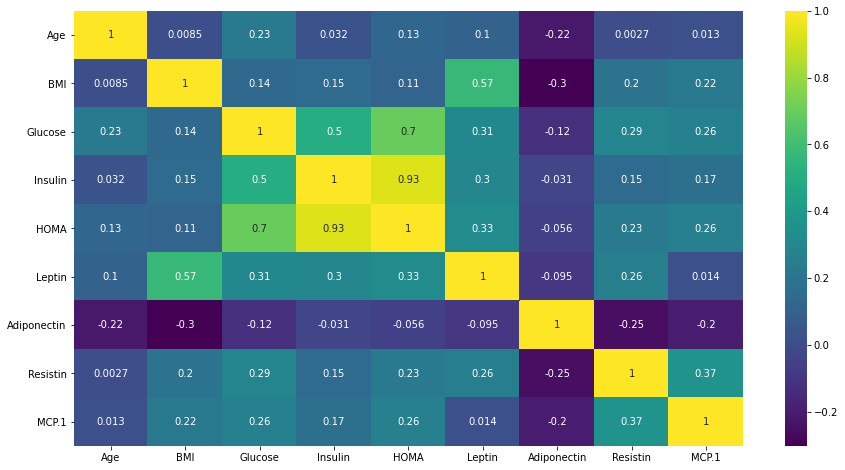

In [16]:
# A correletional heatmap of numberical attributes
plt.figure(figsize=(15,8))
sns.heatmap(df5.corr(), annot=True, cmap='viridis', )
plt.show()

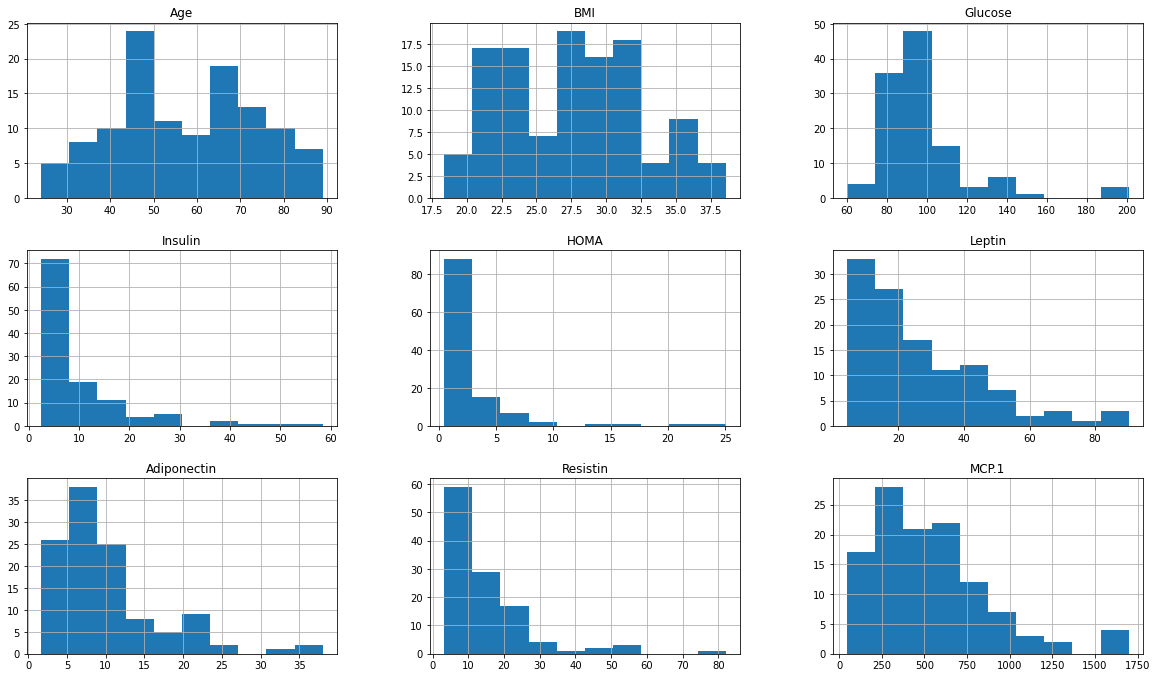

In [17]:
df5.hist(figsize=(20,20), layout=(5,3));

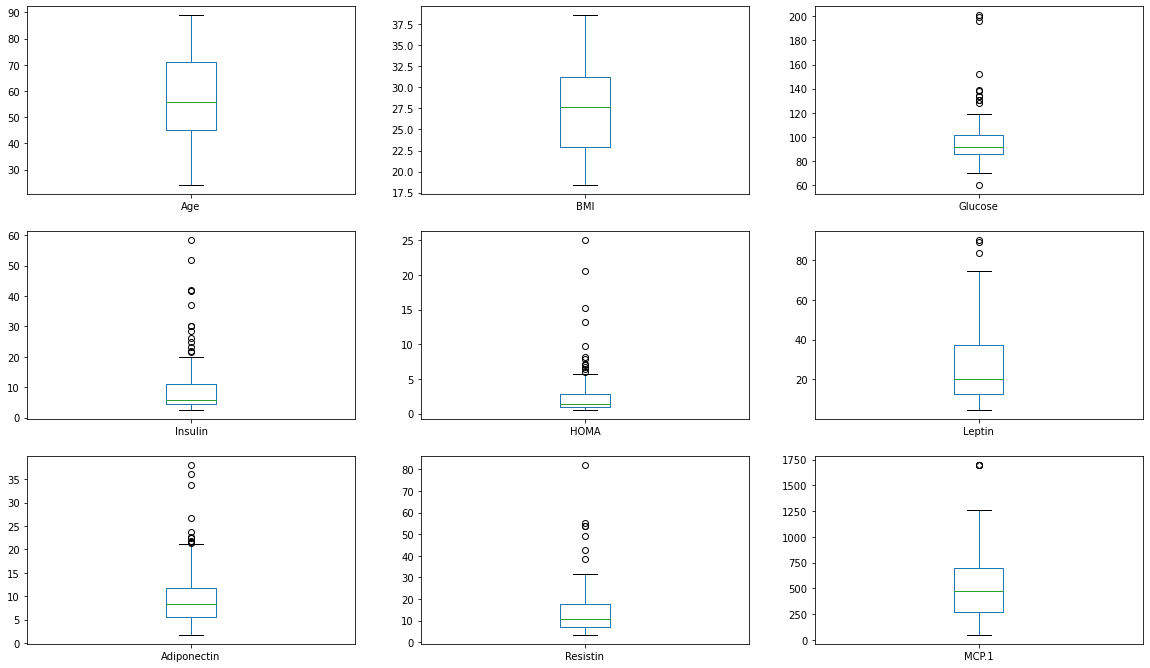

In [18]:
# box and whiskers plot
df5.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20))
plt.show()

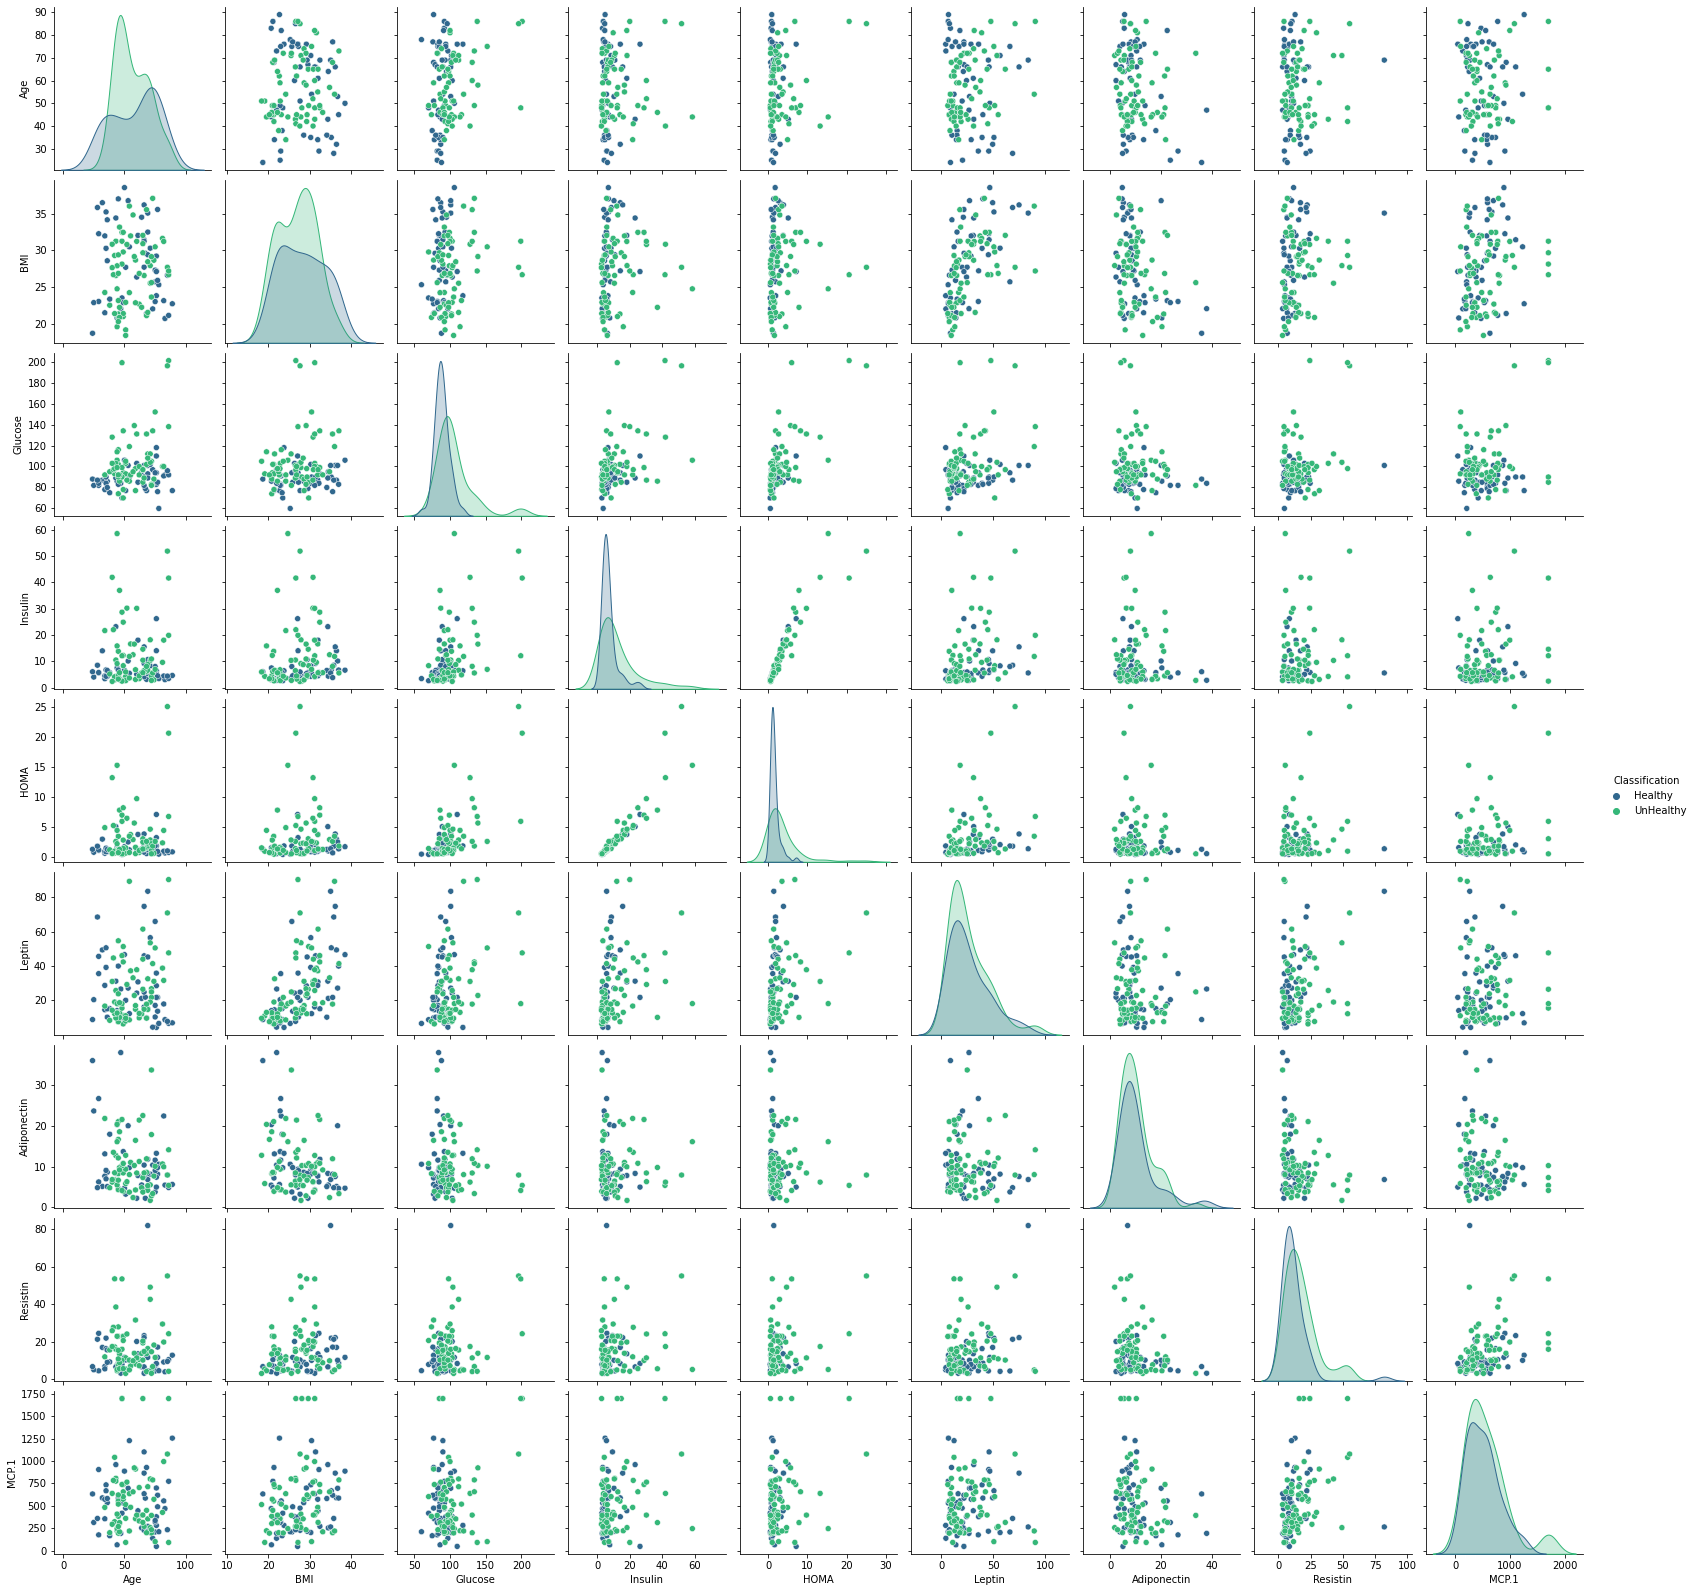

In [19]:
sns.pairplot(df5, hue = 'Classification', palette='viridis', vars = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'])
plt.show()

In [20]:
# Grouping patients with and without heart diseases into two dinstinct dataframe for use in visualization below
Classification1=df5[df5['Classification']=='UnHealthy']
Classification0=df5[df5['Classification']=='Healthy']

**Review of Age Distribution**

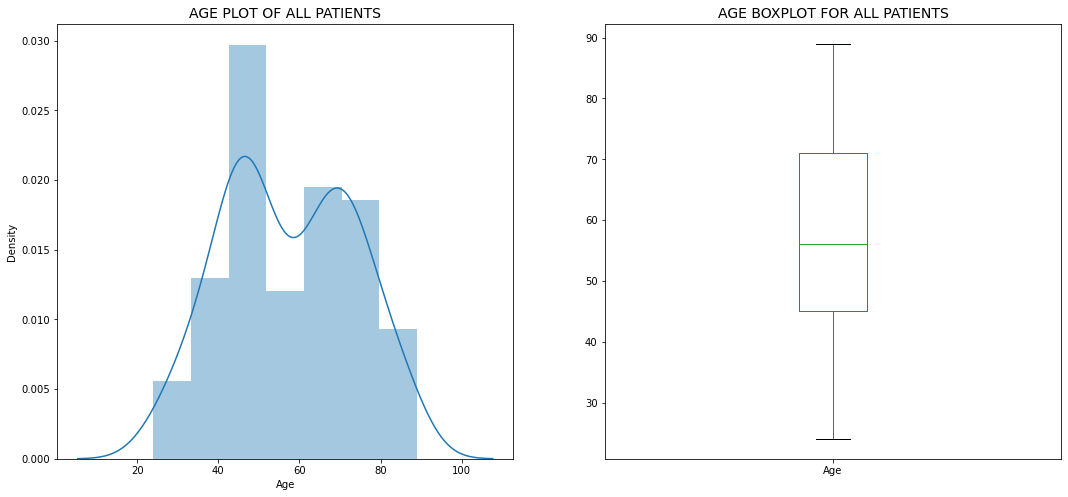

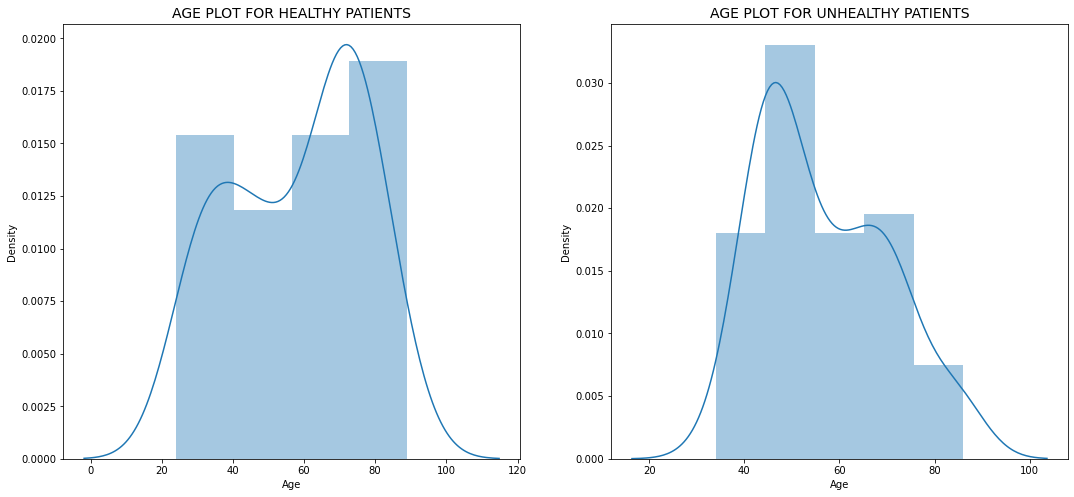

In [21]:
# plotting 'Age' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['Age'])
plt.title('AGE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['Age'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('AGE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Age' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['Age'])
plt.title('AGE PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'Age' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['Age'])
plt.title('AGE PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of BMI Distribution**

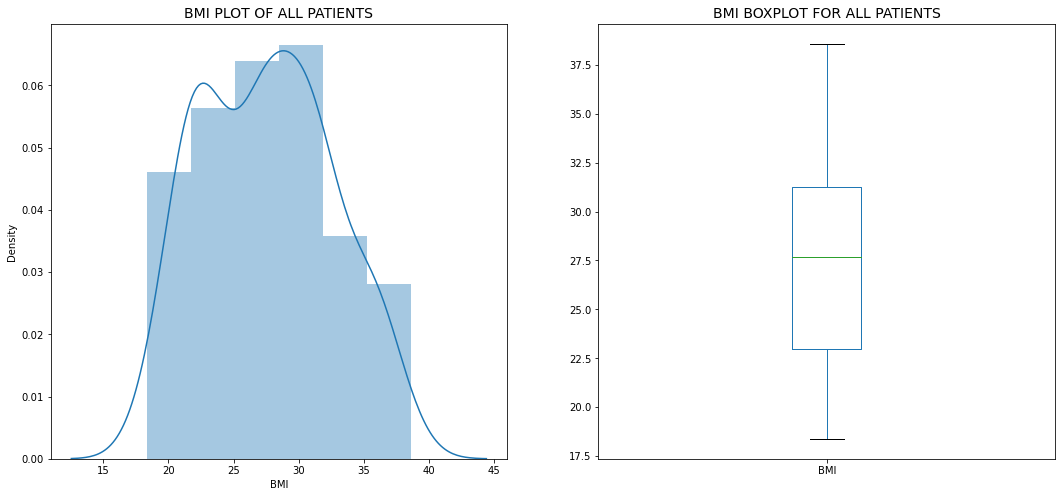

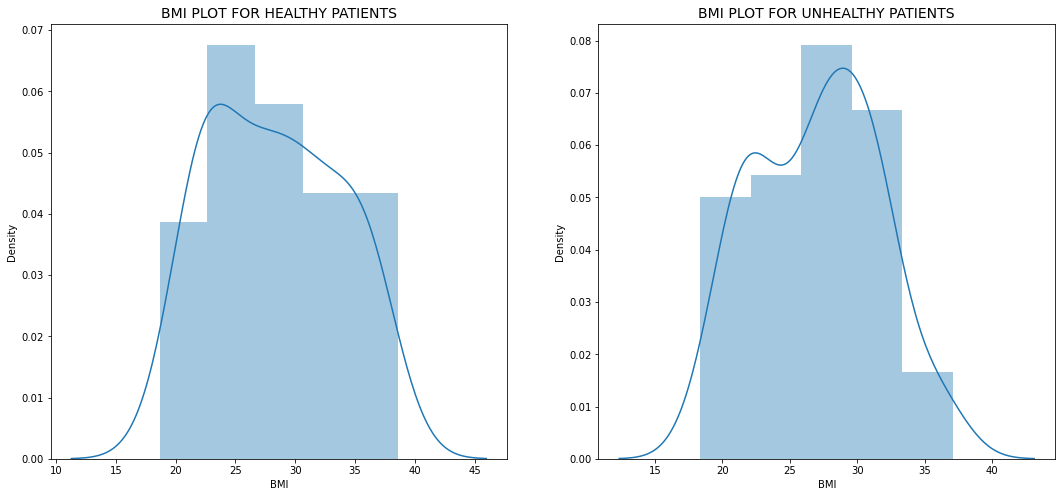

In [22]:
# plotting 'BMI' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['BMI'])
plt.title('BMI PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['BMI'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('BMI BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'BMI' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['BMI'])
plt.title('BMI PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'BMI' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['BMI'])
plt.title('BMI PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of 'Glucose' Distribution**

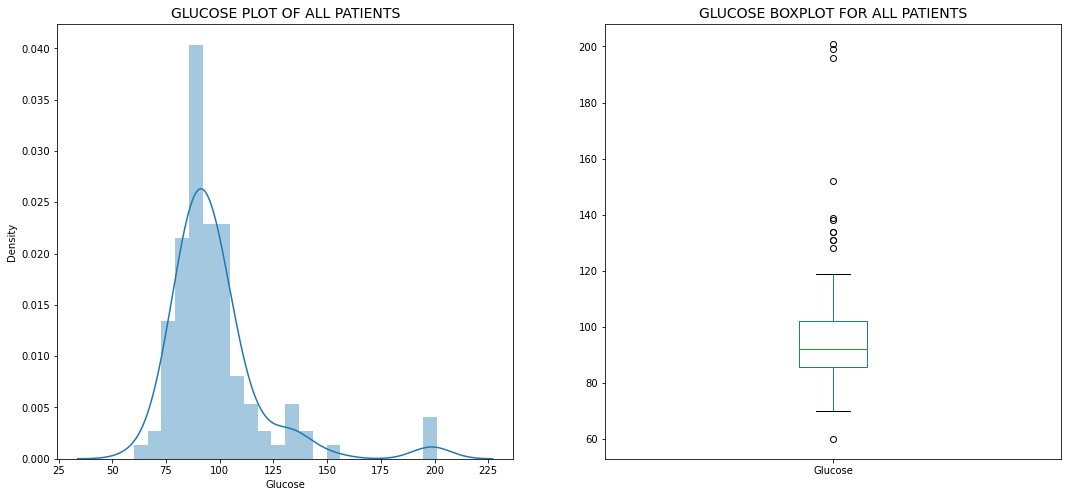

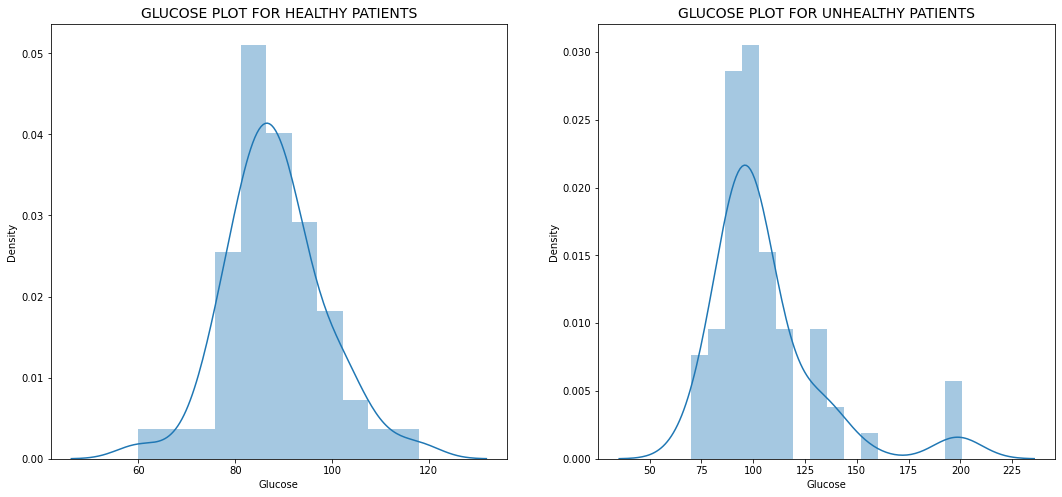

In [23]:
# plotting 'Glucose' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['Glucose'])
plt.title('GLUCOSE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['Glucose'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('GLUCOSE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Glucose' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['Glucose'])
plt.title('GLUCOSE PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'Glucose' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['Glucose'])
plt.title('GLUCOSE PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of Insulin Distribution**

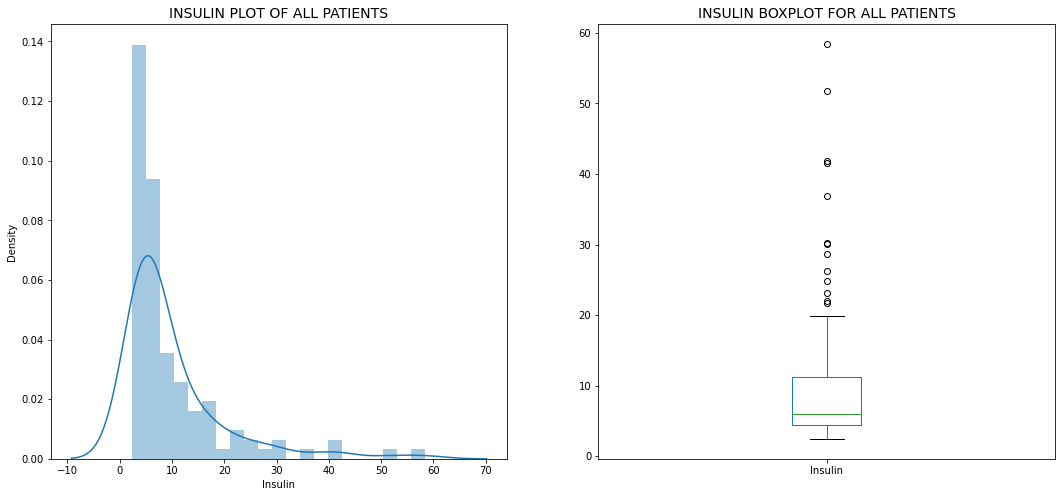

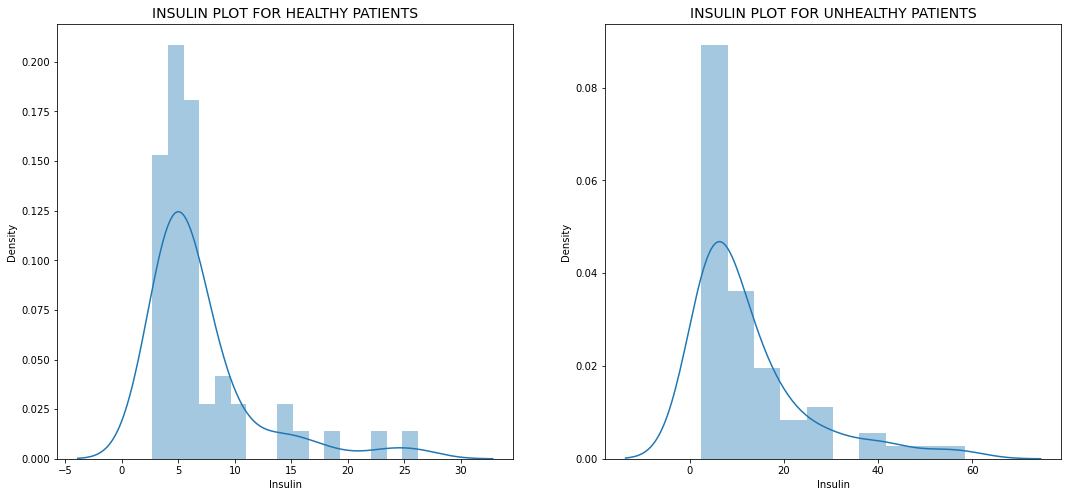

In [24]:
# plotting 'Insulin' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['Insulin'])
plt.title('INSULIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['Insulin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('INSULIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Insulin' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['Insulin'])
plt.title('INSULIN PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'Insulin' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['Insulin'])
plt.title('INSULIN PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of HOMA Distribution**

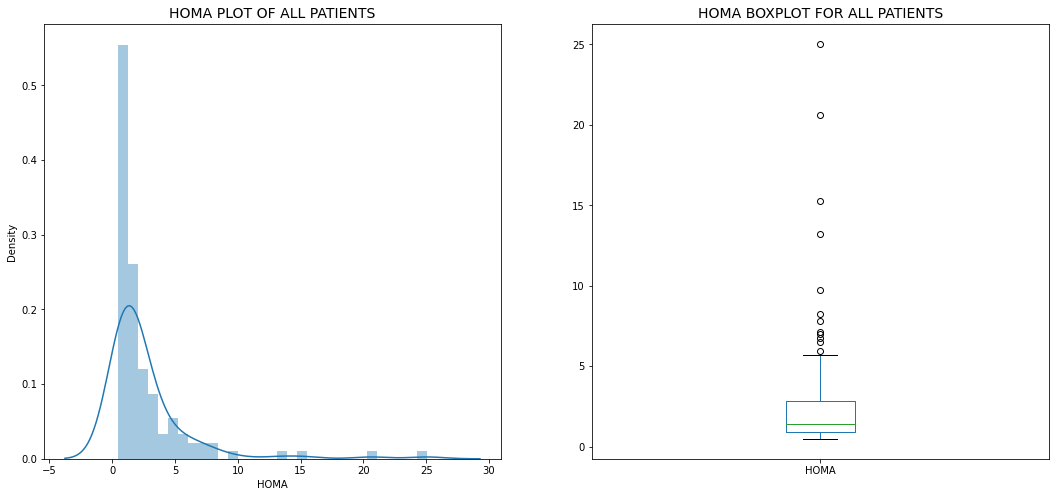

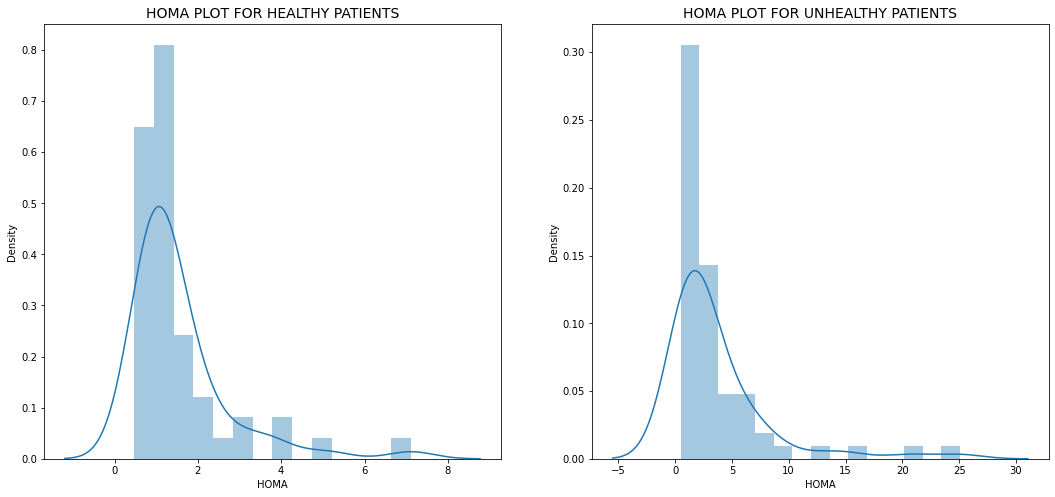

In [25]:
# plotting 'HOMA' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['HOMA'])
plt.title('HOMA PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['HOMA'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('HOMA BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'HOMA' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['HOMA'])
plt.title('HOMA PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'HOMA' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['HOMA'])
plt.title('HOMA PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of Leptin Distribution**

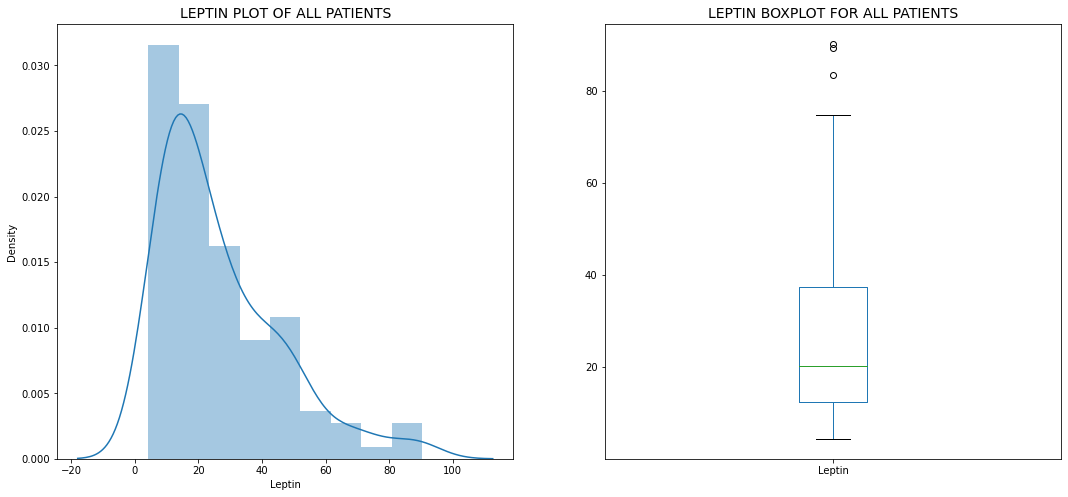

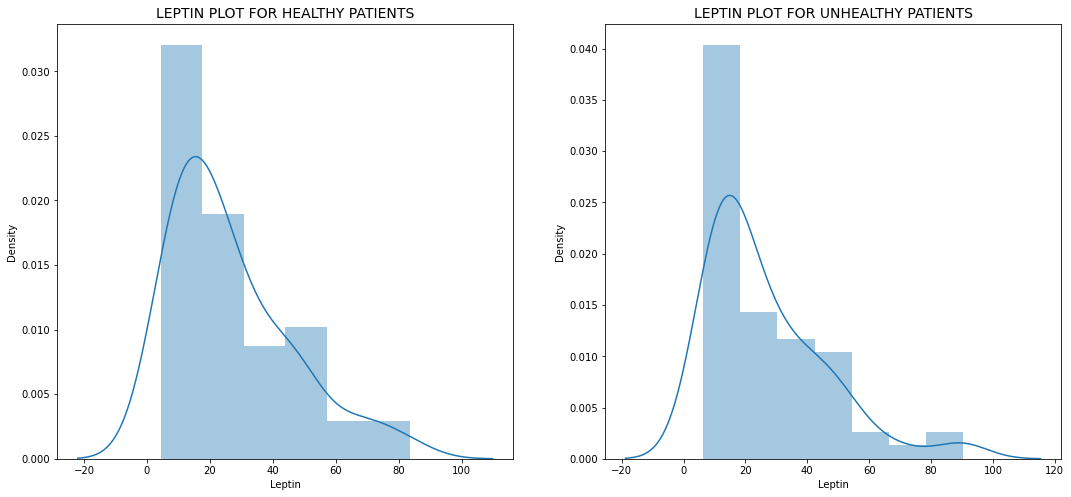

In [26]:
# plotting 'Leptin' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['Leptin'])
plt.title('LEPTIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['Leptin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('LEPTIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Leptin' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['Leptin'])
plt.title('LEPTIN PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'Leptin' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['Leptin'])
plt.title('LEPTIN PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of Adiponectin Distribution**

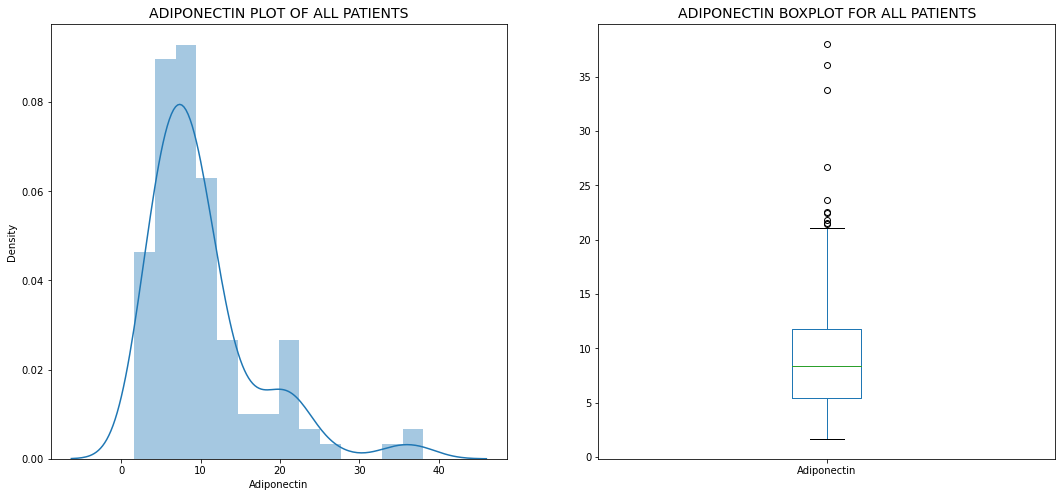

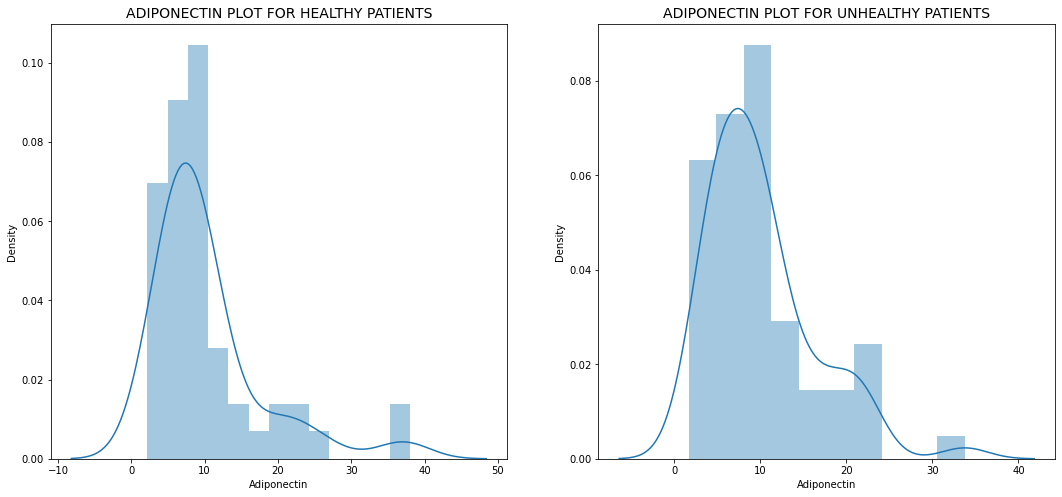

In [27]:
# plotting 'Adiponectin' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['Adiponectin'])
plt.title('ADIPONECTIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['Adiponectin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('ADIPONECTIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Adiponectin' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['Adiponectin'])
plt.title('ADIPONECTIN PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'Adiponectin' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['Adiponectin'])
plt.title('ADIPONECTIN PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of Resistin Distribution**

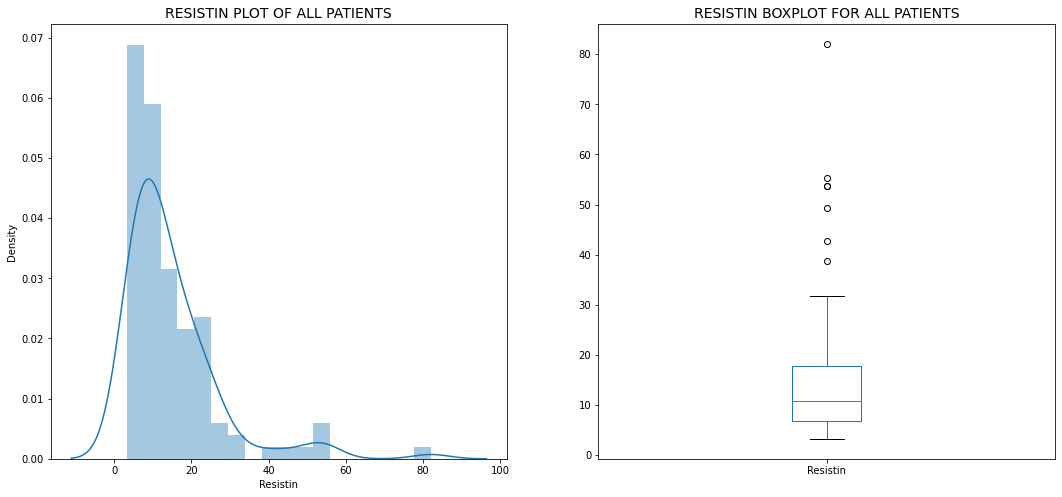

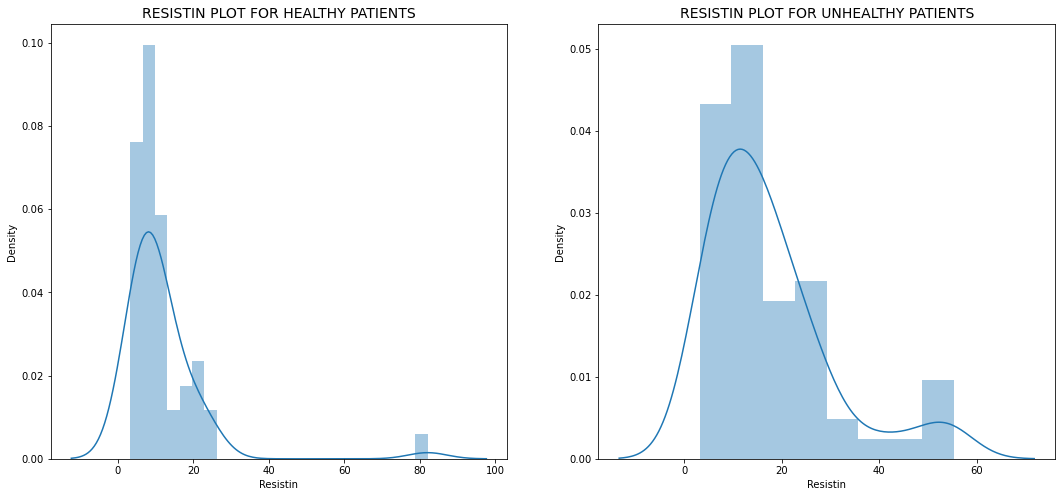

In [28]:
# plotting 'Resistin' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['Resistin'])
plt.title('RESISTIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['Resistin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('RESISTIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Resistin' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['Resistin'])
plt.title('RESISTIN PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'Resistin' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['Resistin'])
plt.title('RESISTIN PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

**Review of MCP.1 Distribution**

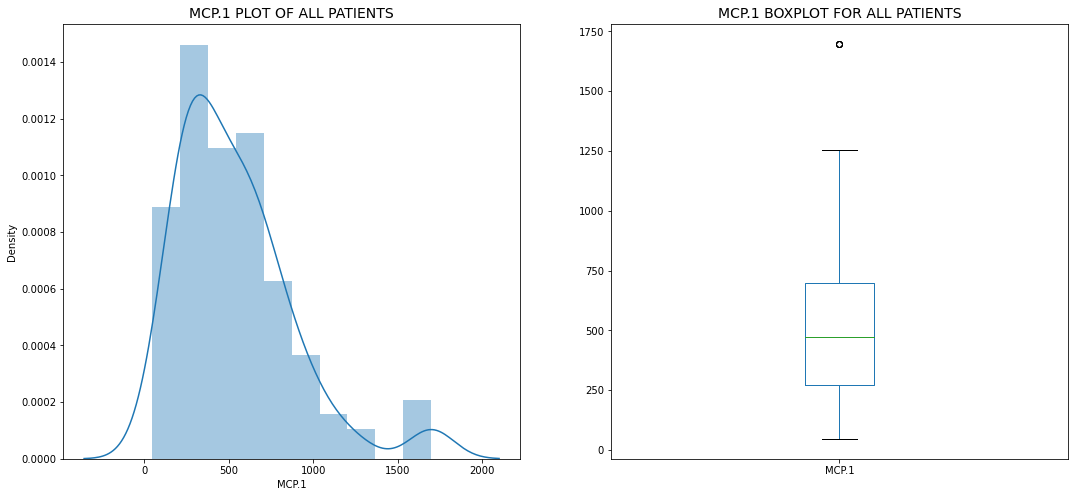

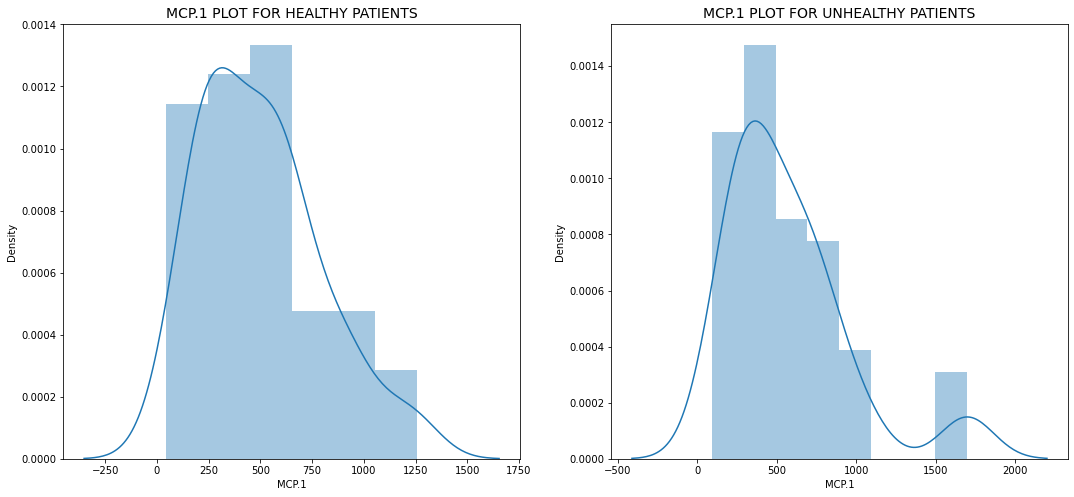

In [29]:
# plotting 'MCP.1' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df5['MCP.1'])
plt.title('MCP.1 PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df5['MCP.1'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('MCP.1 BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'MCP.1' distribution for Healthy patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Classification0['MCP.1'])
plt.title('MCP.1 PLOT FOR HEALTHY PATIENTS', fontsize=14, weight='light')

# plotting 'MCP.1' distribution for UnHealthy patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Classification1['MCP.1'])
plt.title('MCP.1 PLOT FOR UNHEALTHY PATIENTS', fontsize=14, weight='light')

plt.show()

# Machine Learning Part B

In [30]:
# Python libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ML algorithms & cross validation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Python libraries for machine learning evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import matthews_corrcoef,fbeta_score,log_loss,precision_score,f1_score,recall_score
from sklearn import metrics

from scipy import stats


Preparing the data for Model 

Feature Normalization

In [31]:
# Converting categorical attributes to 1 & 0 for ML modelling

df5['Classification'][df5['Classification'] == 'Healthy'] = 0
df5['Classification'][df5['Classification'] == 'UnHealthy'] = 1

df5['Classification'] = df5['Classification'].astype(np.int64)

df5.head(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0


In [32]:
# checking shape of dataset after outlier removal
df5.shape

(116, 10)

In [33]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
df5[columns_to_scale] = StandardScaler.fit_transform(df5[columns_to_scale])

In [34]:
df5.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251,0
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224,0
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214,0
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718,0
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716,0


In [35]:
#seperating 'goal' variable from other features
X5 = df5.drop(['Classification'], axis=1) 
y5 = df5['Classification']

In [36]:
X5.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716


In [37]:
y5.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64

REchecking Correlation

<AxesSubplot:title={'center':'Correlation with Goal'}>

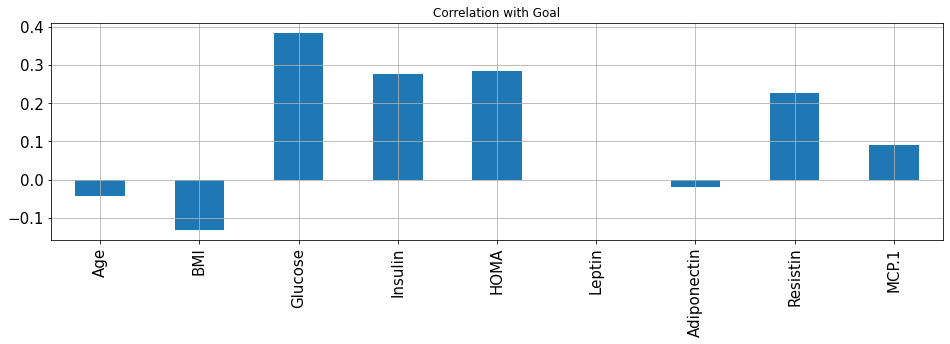

In [38]:
#Correlation with Response Variable class

X5.corrwith(y5).plot.bar(
        figsize = (16, 4), title = "Correlation with Goal", fontsize = 15,
        rot = 90, grid = True)


In [39]:
X_train5, X_test5,y_train5, y_test5=train_test_split(X5,y5,test_size=0.3,random_state=40)

In [40]:
## checking distribution of Classification variable in train test split
print(' ')
print('*****************************************************')
print("------'X5' & 'y5' Test & Train Sizes-------------------")
print('*****************************************************')
print('X_train5 Size = ', X_train5.size, '::::: X_test5 Size = ',X_test5.size)
print('y_train5 Size = ', y_train5.size, ' ::::: y_test5 Size = ', y_test5.size)

print(' ')

print('*****************************************************')
print('*****************************************************')

print('Distribution of Classification variable in training set5')
print(y_train5.value_counts())

print('Distribution of Classification variable in test set5')
print(y_test5.value_counts())

 
*****************************************************
------'X5' & 'y5' Test & Train Sizes-------------------
*****************************************************
X_train5 Size =  729 ::::: X_test5 Size =  315
y_train5 Size =  81  ::::: y_test5 Size =  35
 
*****************************************************
*****************************************************
Distribution of Classification variable in training set5
1    46
0    35
Name: Classification, dtype: int64
Distribution of Classification variable in test set5
1    18
0    17
Name: Classification, dtype: int64


In [41]:
print('*****************************************************')

print('Shape of "Training Set5" X_train5 and Y_train5')
print('X_train5 = ', X_train5.shape, ' ::::: y_train5 = ', y_train5.shape)
print(' ')
print('*****************************************************')
print('*****************************************************')

print('Shape of "Test Sets" X_test and Y_test')
print('X_test5  =  ', X_test5.shape, ' ::::: y_test5 = ', y_test5.shape)
print(' ')
print('*****************************************************')

*****************************************************
Shape of "Training Set5" X_train5 and Y_train5
X_train5 =  (81, 9)  ::::: y_train5 =  (81,)
 
*****************************************************
*****************************************************
Shape of "Test Sets" X_test and Y_test
X_test5  =   (35, 9)  ::::: y_test5 =  (35,)
 
*****************************************************


# Cross Validation of Models

In [42]:
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel5():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000, eval_metric='mlogloss')))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100, eval_metric='mlogloss')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000, eval_metric='mlogloss')))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [43]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine5(X_train5, y_train5,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train5, y_train5, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [44]:
models = GetBasedModel5()
names,results = BasedLine5(X_train5, y_train5,models)

LR_L2: 0.740278 (0.142461)
LDA: 0.702778 (0.140436)
KNN7: 0.702778 (0.218740)
KNN5: 0.776389 (0.166719)
KNN9: 0.702778 (0.225770)
KNN11: 0.640278 (0.198999)
CART: 0.619444 (0.189846)
NB: 0.519444 (0.136677)
SVM Linear: 0.727778 (0.146487)
SVM RBF: 0.715278 (0.194767)
AB: 0.665278 (0.195478)
GBM: 0.704167 (0.194052)
RF_Ent100: 0.704167 (0.148429)
RF_Gini100: 0.654167 (0.183570)
ET100: 0.751389 (0.168789)
ET500: 0.729167 (0.153941)
MLP: 0.752778 (0.167912)
SGD3000: 0.702778 (0.203954)
XGB_2000: 0.702778 (0.128830)
XGB_500: 0.702778 (0.128830)
XGB_100: 0.715278 (0.126724)
XGB_1000: 0.702778 (0.128830)
ET1000: 0.727778 (0.184278)


# MODELS

# Logistics Regression

In [45]:
Lreg5 = LogisticRegression()
Lreg5.fit(X_train5, y_train5)
y_pred_Lreg5 = Lreg5.predict(X_test5)

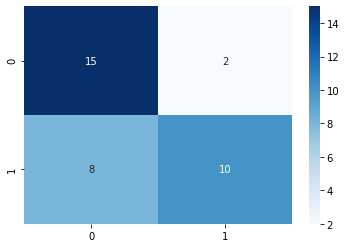

In [46]:
cm=confusion_matrix(y_test5,y_pred_Lreg5)
sns.heatmap(cm, annot=True,cmap='Blues')
#sns.heatmap(cm, annot=True,cmap='Blues', figsize=(18,6))
plt.show()

In [47]:
accuracy_score(y_test5,y_pred_Lreg5)

0.7142857142857143

In [48]:
print(classification_report(y_test5, y_pred_Lreg5))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.83      0.56      0.67        18

    accuracy                           0.71        35
   macro avg       0.74      0.72      0.71        35
weighted avg       0.75      0.71      0.71        35



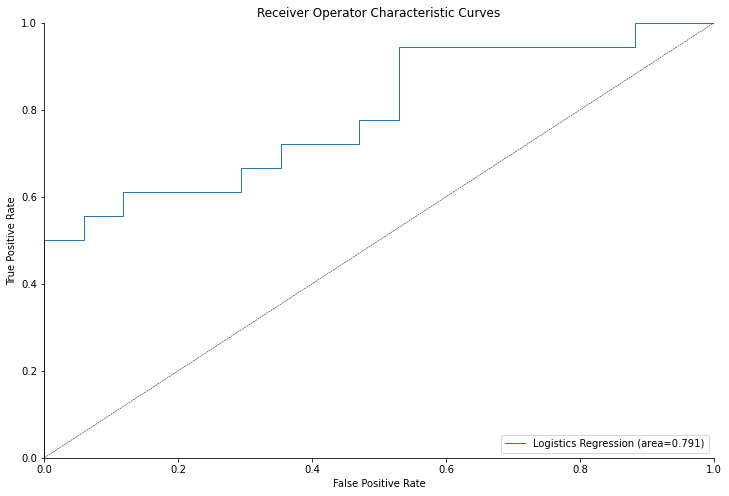

In [49]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,Lreg5.predict_proba(X_test5),label='Logistics Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

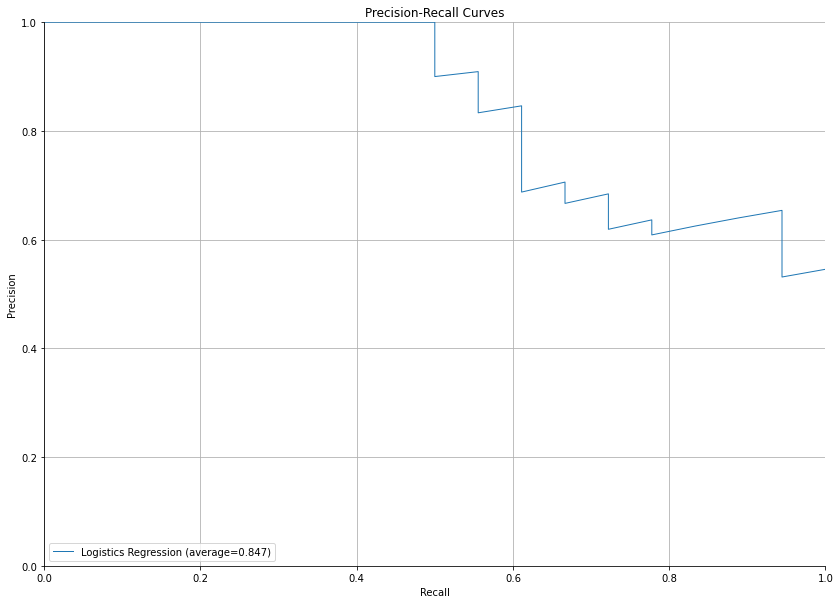

In [50]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test5,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test5, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,Lreg5.predict_proba(X_test5),label='Logistics Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Random Forest Classifier (criterion = 'entropy')

In [51]:
rf_ent5 = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent5.fit(X_train5, y_train5)
y_pred_rfe5 = rf_ent5.predict(X_test5)

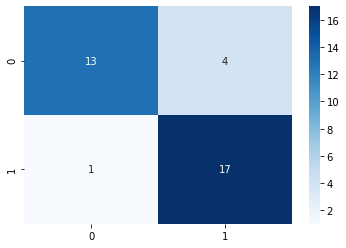

In [52]:
cm=confusion_matrix(y_test5,y_pred_rfe5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [53]:
accuracy_score(y_test5,y_pred_rfe5)

0.8571428571428571

In [54]:
print(classification_report(y_test5, y_pred_rfe5))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.81      0.94      0.87        18

    accuracy                           0.86        35
   macro avg       0.87      0.85      0.86        35
weighted avg       0.87      0.86      0.86        35



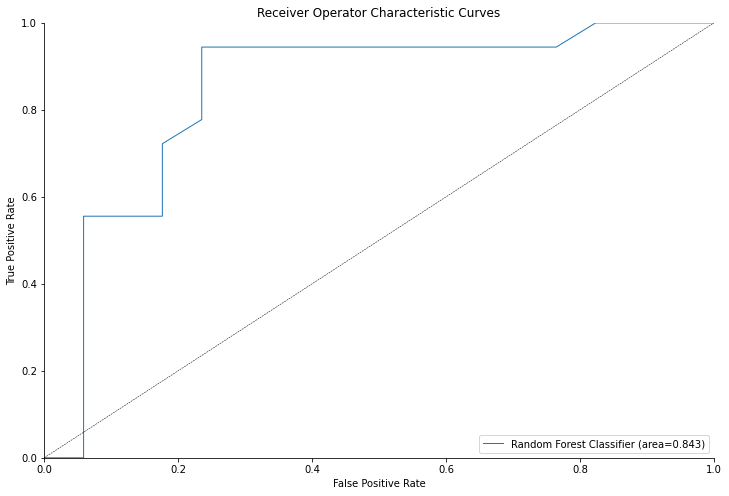

In [55]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,rf_ent5.predict_proba(X_test5),label='Random Forest Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

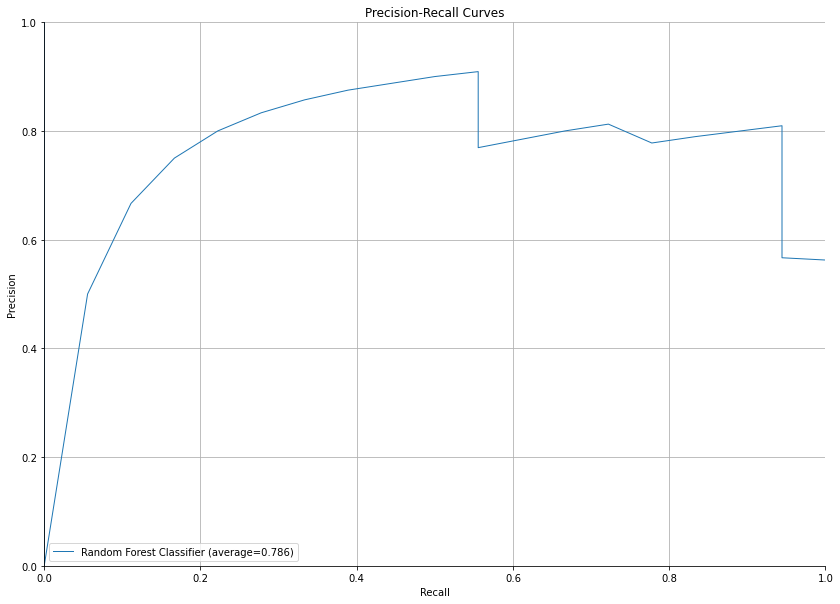

In [56]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,rf_ent5.predict_proba(X_test5),label='Random Forest Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Multi Layer Perceptron

In [57]:
mlp5 = MLPClassifier()
mlp5.fit(X_train5,y_train5)
y_pred_mlp5 = mlp5.predict(X_test5)

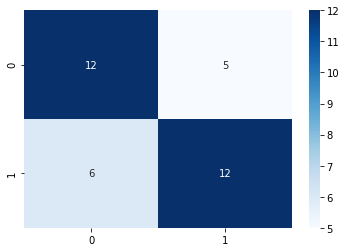

In [58]:
cm=confusion_matrix(y_test5,y_pred_mlp5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [59]:
accuracy_score(y_test5,y_pred_mlp5)

0.6857142857142857

In [60]:
print(classification_report(y_test5, y_pred_mlp5))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.71      0.67      0.69        18

    accuracy                           0.69        35
   macro avg       0.69      0.69      0.69        35
weighted avg       0.69      0.69      0.69        35



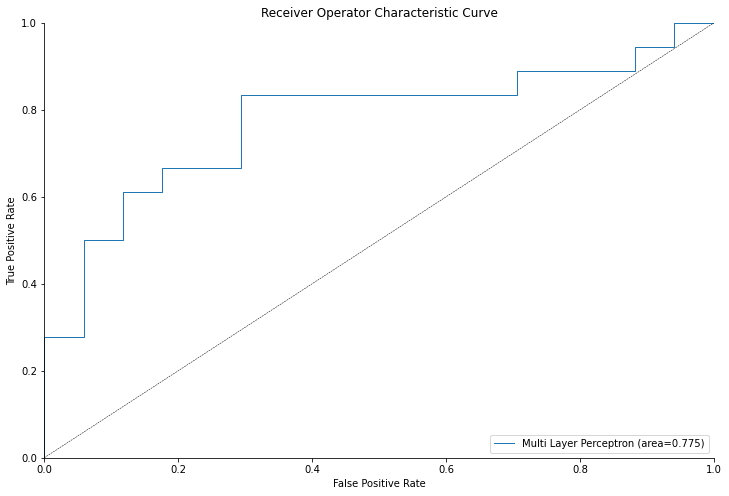

In [61]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,mlp5.predict_proba(X_test5),label='Multi Layer Perceptron',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

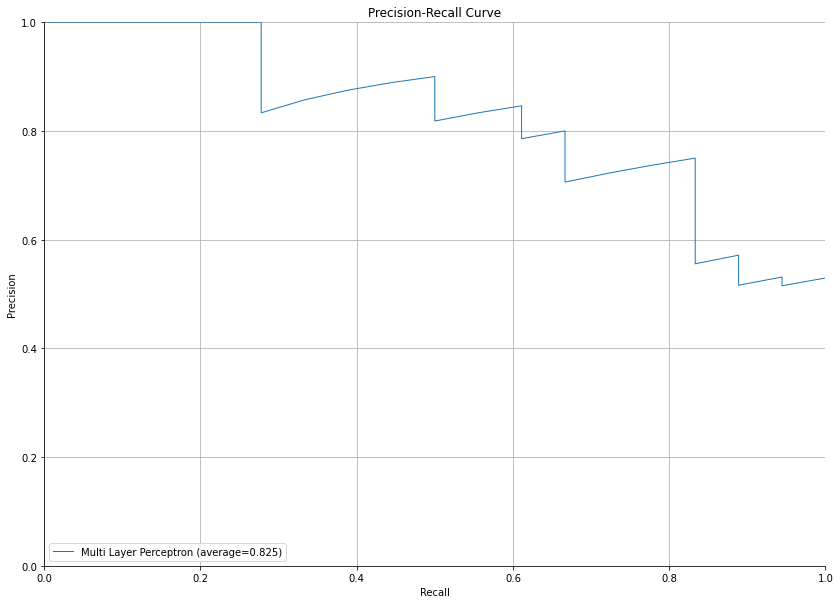

In [62]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,mlp5.predict_proba(X_test5),label='Multi Layer Perceptron',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# K' Nearest Neighbour (n=9)

In [63]:
knn5 = KNeighborsClassifier(9)
knn5.fit(X_train5,y_train5)
y_pred_knn5= knn5.predict(X_test5)

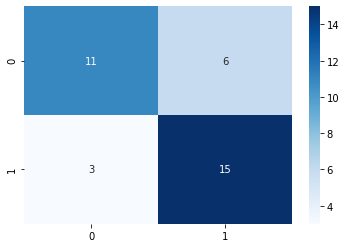

In [64]:
cm=confusion_matrix(y_test5,y_pred_knn5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [65]:
accuracy_score(y_test5,y_pred_knn5)

0.7428571428571429

In [66]:
print(classification_report(y_test5, y_pred_knn5))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.71      0.83      0.77        18

    accuracy                           0.74        35
   macro avg       0.75      0.74      0.74        35
weighted avg       0.75      0.74      0.74        35



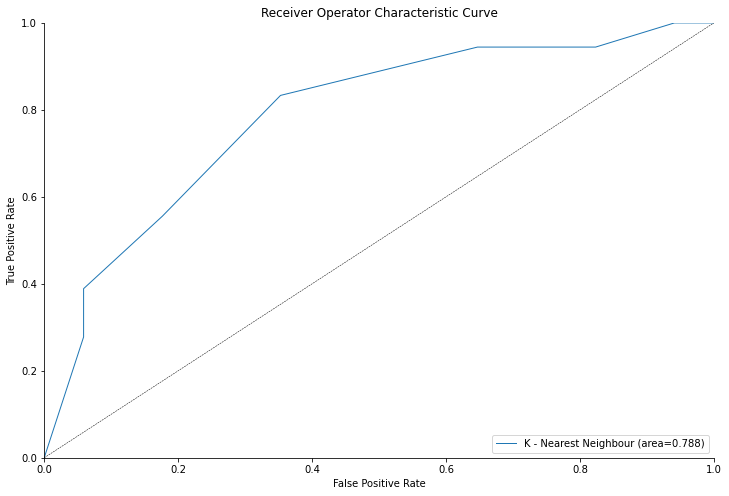

In [67]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,knn5.predict_proba(X_test5),label='K - Nearest Neighbour',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

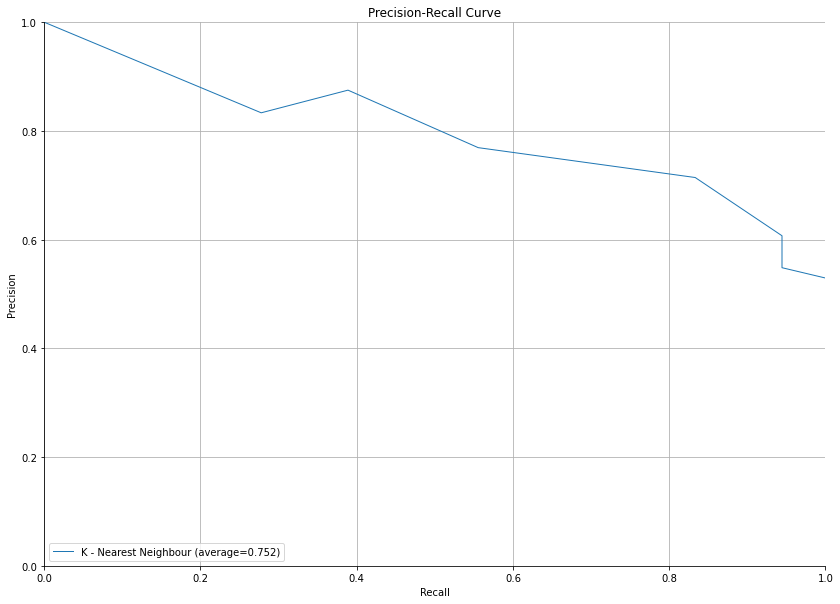

In [68]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,knn5.predict_proba(X_test5),label='K - Nearest Neighbour',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Extra Tree Classifier (n_estimators=500)

In [69]:
et_100_5 = ExtraTreesClassifier(n_estimators= 100)
et_100_5.fit(X_train5,y_train5)
y_pred_et_100_5 = et_100_5.predict(X_test5)

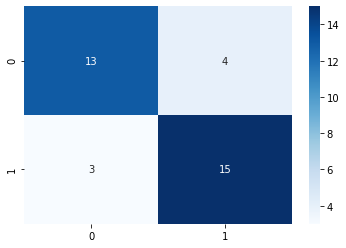

In [70]:
cm=confusion_matrix(y_test5,y_pred_et_100_5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [71]:
accuracy_score(y_test5,y_pred_et_100_5)

0.8

In [72]:
print(classification_report(y_test5, y_pred_et_100_5))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.79      0.83      0.81        18

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



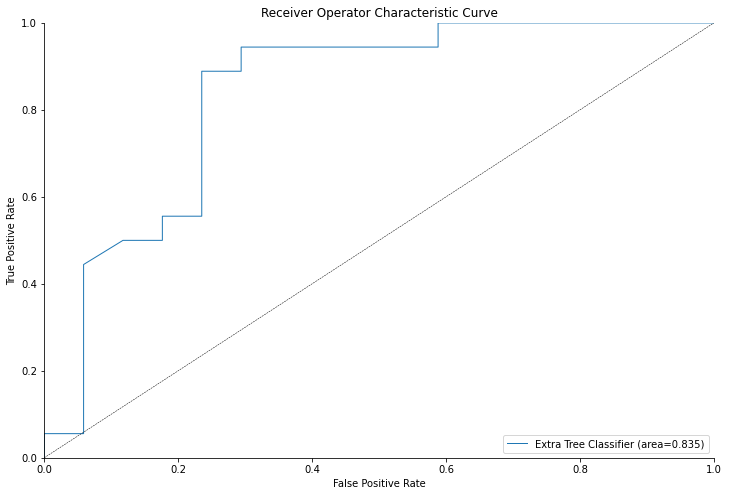

In [73]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,et_100_5.predict_proba(X_test5),label='Extra Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

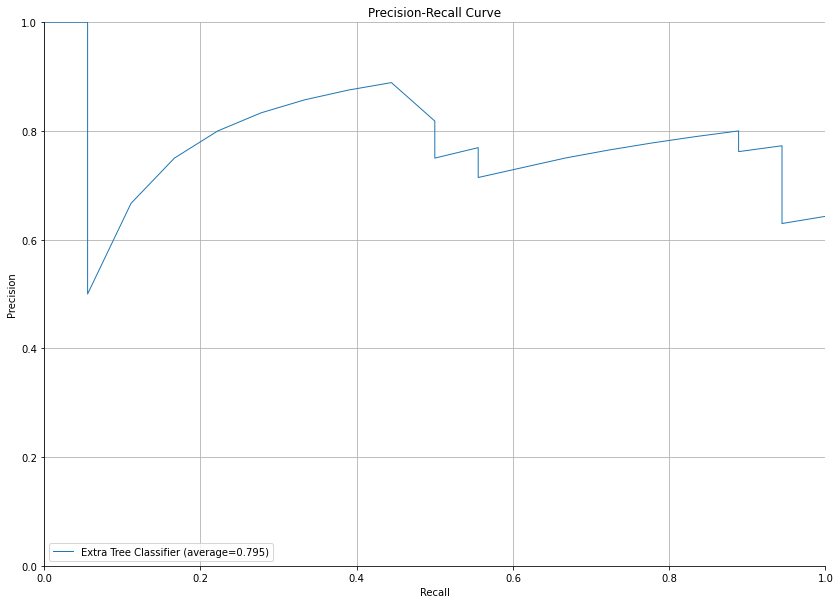

In [74]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,et_100_5.predict_proba(X_test5),label='Extra Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# XGBoost (n_estimators=500)

In [75]:
import xgboost as xgb
xgb5 = xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')
xgb5.fit(X_train5,y_train5)
y_pred_xgb5 = xgb5.predict(X_test5)

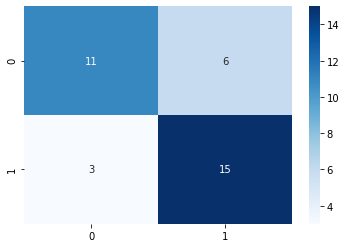

In [76]:
cm=confusion_matrix(y_test5,y_pred_xgb5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [77]:
accuracy_score(y_test5,y_pred_xgb5)

0.7428571428571429

In [78]:
print(classification_report(y_test5, y_pred_xgb5))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.71      0.83      0.77        18

    accuracy                           0.74        35
   macro avg       0.75      0.74      0.74        35
weighted avg       0.75      0.74      0.74        35



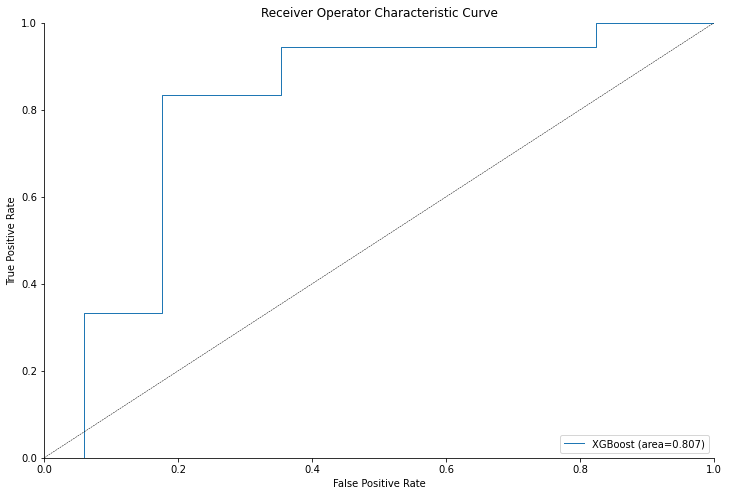

In [79]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,xgb5.predict_proba(X_test5),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

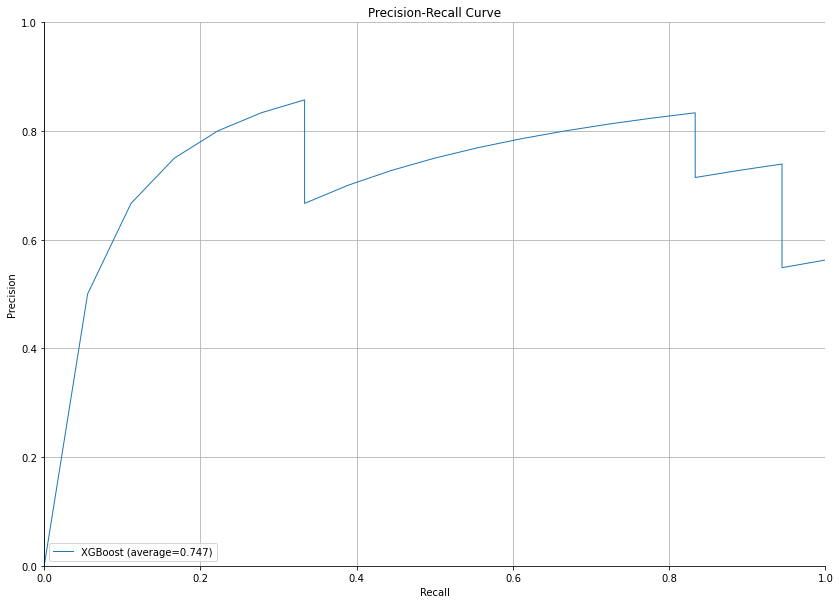

In [80]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,xgb5.predict_proba(X_test5),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Support Vector Classifier (kernel='linear')

In [81]:
svc5 = SVC(kernel='linear',gamma='auto',probability=True)
svc5.fit(X_train5,y_train5)
y_pred_svc5 = svc5.predict(X_test5)

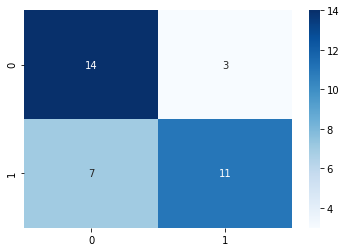

In [82]:
cm=confusion_matrix(y_test5,y_pred_svc5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [83]:
accuracy_score(y_test5,y_pred_svc5)

0.7142857142857143

In [84]:
print(classification_report(y_test5, y_pred_svc5))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        17
           1       0.79      0.61      0.69        18

    accuracy                           0.71        35
   macro avg       0.73      0.72      0.71        35
weighted avg       0.73      0.71      0.71        35



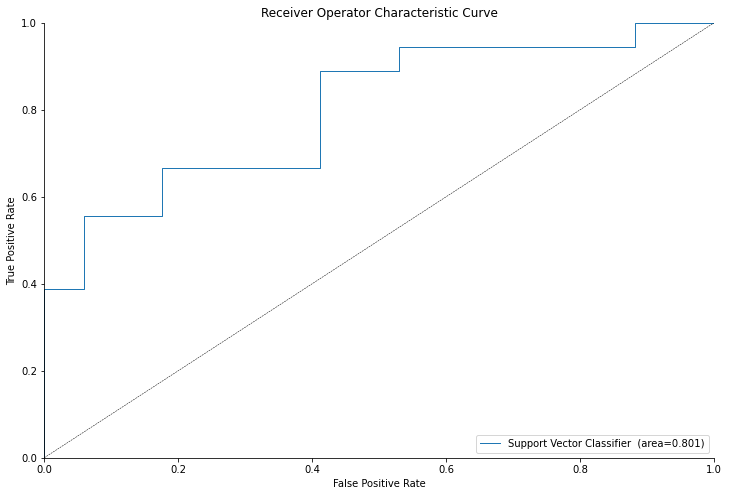

In [85]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,svc5.predict_proba(X_test5),label='Support Vector Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

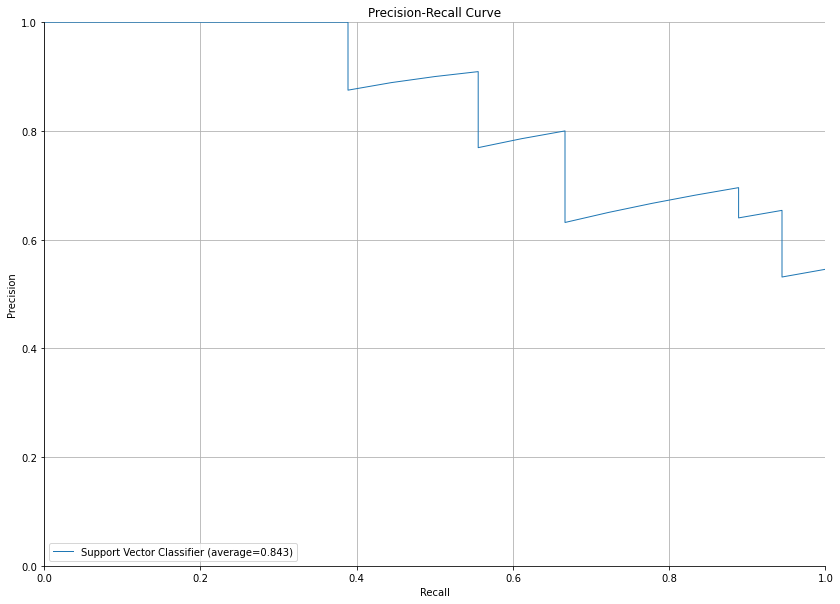

In [86]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,svc5.predict_proba(X_test5),label='Support Vector Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Stochastic Gradient Descent

In [87]:
sgd5 = SGDClassifier(max_iter=1000, tol=1e-4)
sgd5.fit(X_train5,y_train5)
y_pred_sgd5 = sgd5.predict(X_test5)

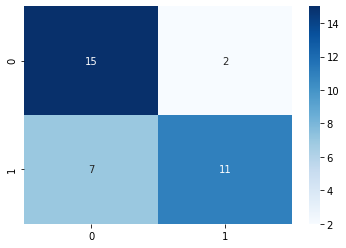

In [88]:
cm=confusion_matrix(y_test5,y_pred_sgd5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [89]:
accuracy_score(y_test5,y_pred_sgd5)

0.7428571428571429

In [90]:
print(classification_report(y_test5, y_pred_sgd5))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        17
           1       0.85      0.61      0.71        18

    accuracy                           0.74        35
   macro avg       0.76      0.75      0.74        35
weighted avg       0.77      0.74      0.74        35



In [91]:
# f, ax = plt.subplots(figsize=(12,8))

# roc_auc_plot(y_test5,sgd5.predict_proba(X_test5),label='Stochastic Gradient Descent',l='-')

# ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
#         )    
# ax.legend(loc="lower right")    
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Receiver Operator Characteristic Curve')
# sns.despine()

In [92]:
# f, ax = plt.subplots(figsize=(14,10))

# precision_recall_plot(y_test5,sgd5.predict_proba(X_test5),label='Stochastic Gradient Descent',l='-')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.legend(loc="lower left")
# ax.grid(True)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Precision-Recall Curve')
# sns.despine()

# Adaboost Classifier

In [93]:
ada5 = AdaBoostClassifier()
ada5.fit(X_train5,y_train5)
y_pred_ada5 = ada5.predict(X_test5)

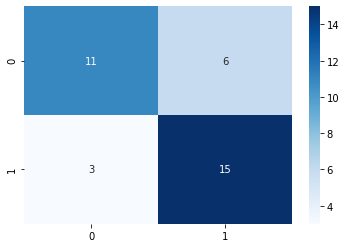

In [94]:
cm=confusion_matrix(y_test5,y_pred_ada5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [95]:
accuracy_score(y_test5,y_pred_ada5)

0.7428571428571429

In [96]:
print(classification_report(y_test5, y_pred_ada5))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.71      0.83      0.77        18

    accuracy                           0.74        35
   macro avg       0.75      0.74      0.74        35
weighted avg       0.75      0.74      0.74        35



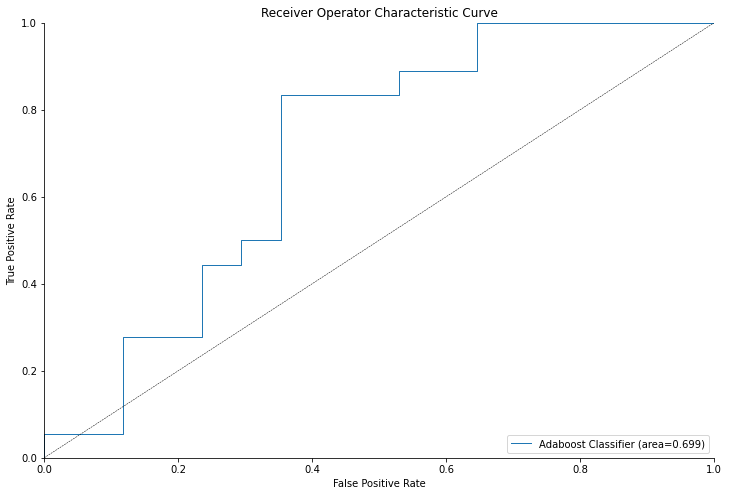

In [97]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,ada5.predict_proba(X_test5),label='Adaboost Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

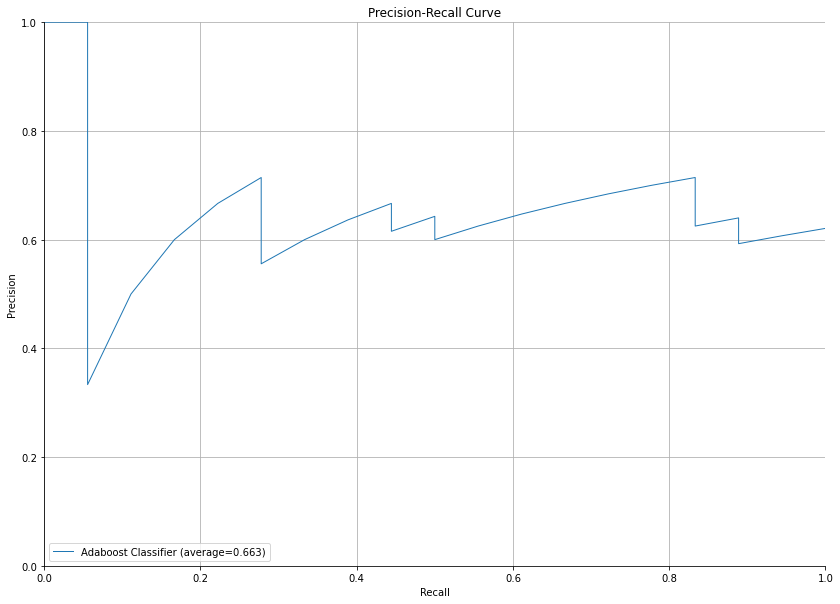

In [98]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,ada5.predict_proba(X_test5),label='Adaboost Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Decision Tree Classifier (CART)

In [99]:
#Visualizing the tree
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

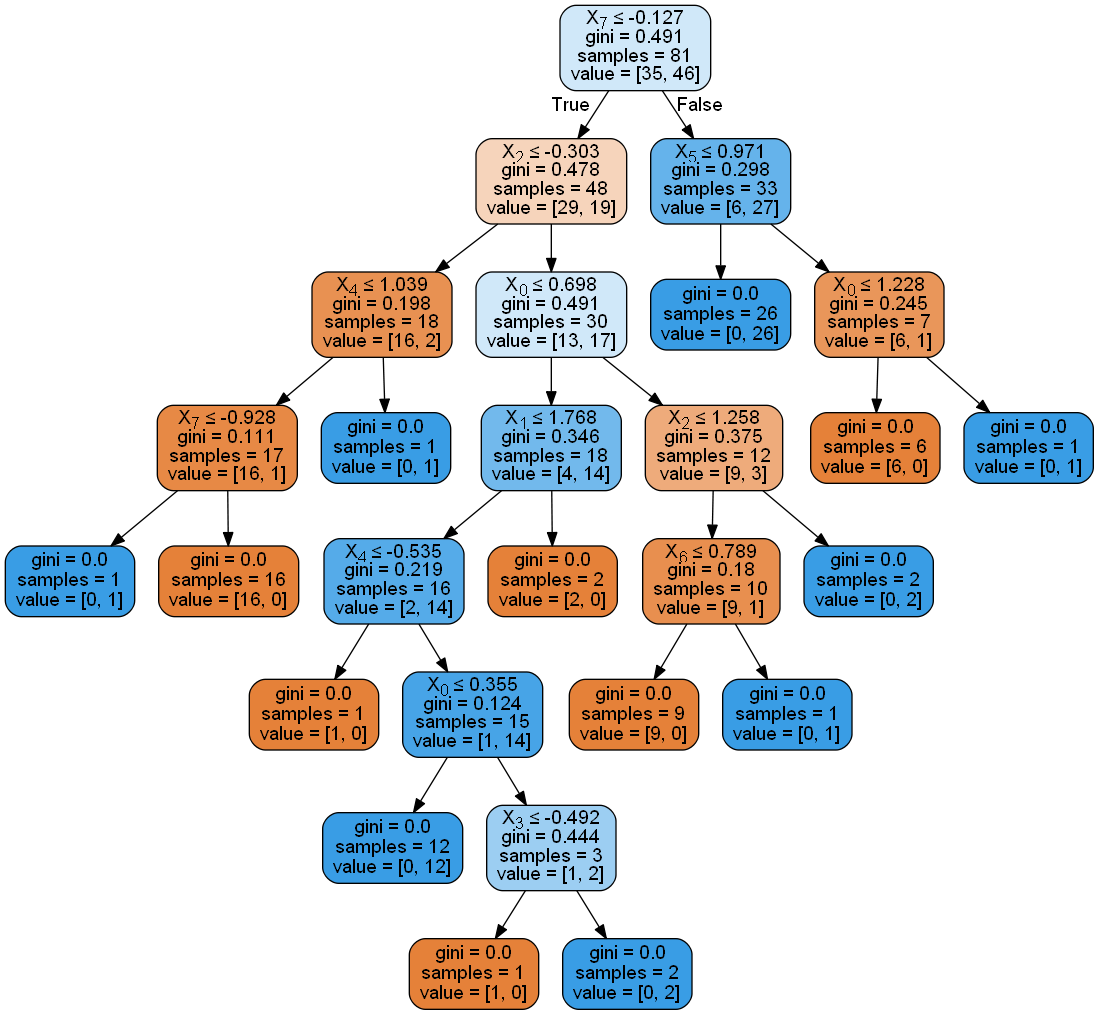

In [100]:
dtc5 = DecisionTreeClassifier()
DT5 = dtc5.fit(X_train5,y_train5)
y_pred_dtc5 = dtc5.predict(X_test5)

dot_data = StringIO()
export_graphviz(DT5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

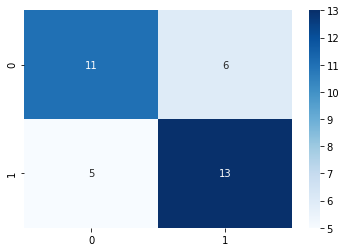

In [101]:
cm=confusion_matrix(y_test5,y_pred_dtc5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [102]:
accuracy_score(y_test5,y_pred_dtc5)

0.6857142857142857

In [103]:
print(classification_report(y_test5, y_pred_dtc5))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.68      0.72      0.70        18

    accuracy                           0.69        35
   macro avg       0.69      0.68      0.68        35
weighted avg       0.69      0.69      0.69        35



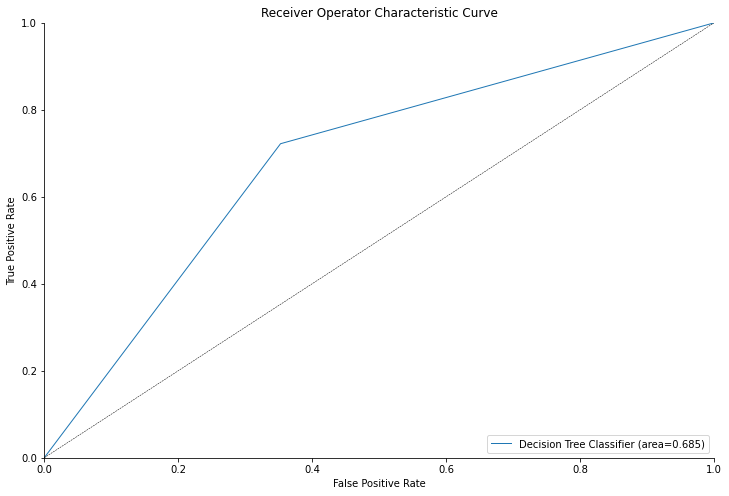

In [104]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,dtc5.predict_proba(X_test5),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

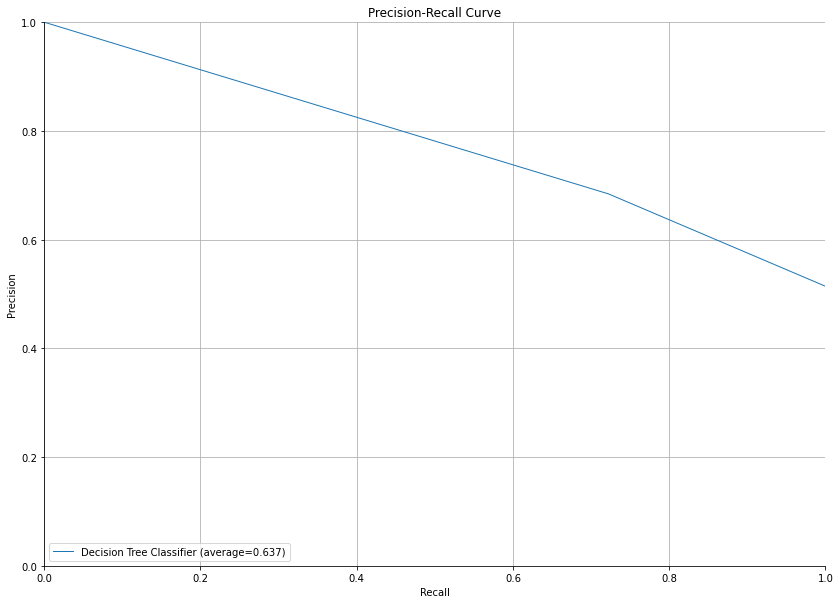

In [105]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,dtc5.predict_proba(X_test5),label='Decision Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Gradient Boosting Machine

In [106]:
gbm5 = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm5.fit(X_train5,y_train5)
y_pred_gbm5 = gbm5.predict(X_test5)

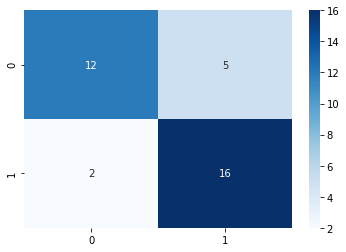

In [107]:
cm=confusion_matrix(y_test5,y_pred_gbm5)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [108]:
accuracy_score(y_test5,y_pred_gbm5)

0.8

In [109]:
print(classification_report(y_test5, y_pred_gbm5))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.76      0.89      0.82        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35



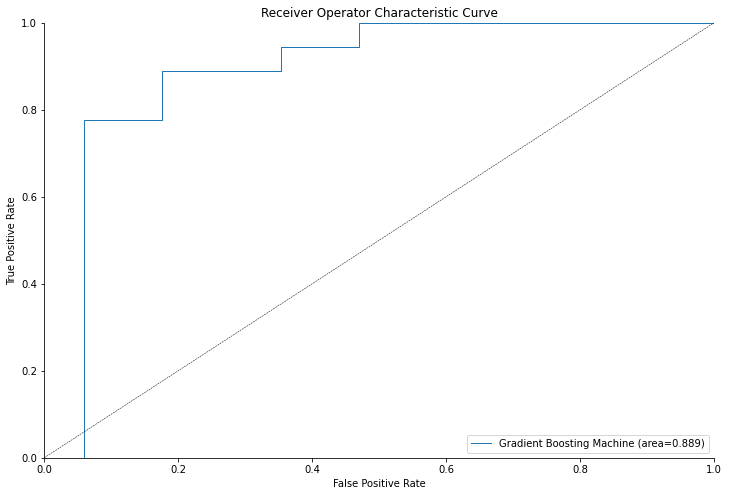

In [110]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,gbm5.predict_proba(X_test5),label='Gradient Boosting Machine',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

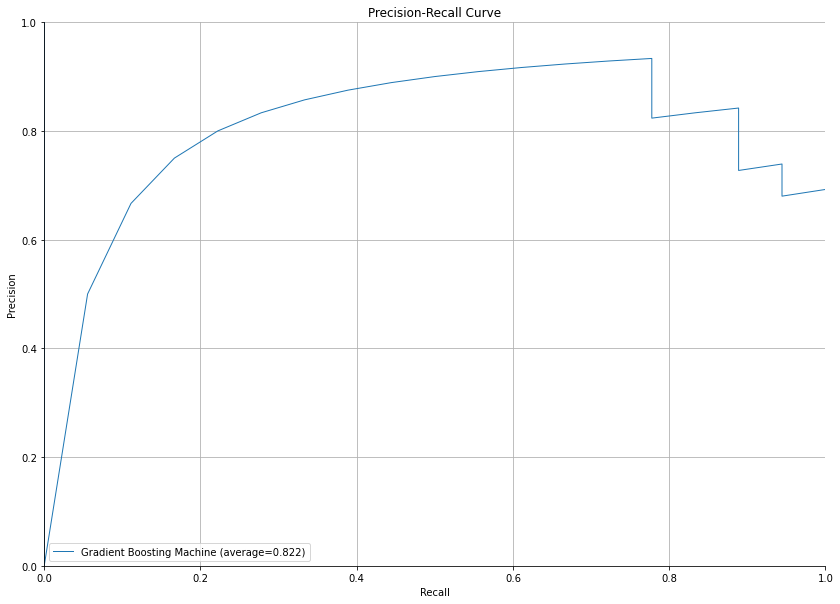

In [111]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,gbm5.predict_proba(X_test5),label='Gradient Boosting Machine',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Comparison of All Models

Model	/ Accuracy	/ Precision	/ Sensitivity	/ Specificity	/ F1 Score	/ ROC	/ Log_Loss	/ mathew_corrcoef

In [112]:
CM5=confusion_matrix(y_test5,y_pred_rfe5)
#sns.heatmap(CM, annot=True)

TN5 = CM5[0][0]
FN5 = CM5[1][0]
TP5 = CM5[1][1]
FP5 = CM5[0][1]
specificity5 = TN5/(TN5+FP5)
loss_log5 = log_loss(y_test5, y_pred_rfe5)
acc5= accuracy_score(y_test5, y_pred_rfe5)
roc5=roc_auc_score(y_test5, y_pred_rfe5)
prec5 = precision_score(y_test5, y_pred_rfe5)
rec5 = recall_score(y_test5, y_pred_rfe5)
f1_5 = f1_score(y_test5, y_pred_rfe5)

mathew5 = matthews_corrcoef(y_test5, y_pred_rfe5)
model_results5 =pd.DataFrame([['Random Forest',acc5, prec5,rec5,specificity5, f1_5,roc5, loss_log5,mathew5]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])


In [113]:
data5 = {        'MLP': y_pred_mlp5, 
                'KNN': y_pred_knn5, 
                'EXtra tree classifier': y_pred_et_100_5,
                'XGB': y_pred_xgb5, 
                'SVC': y_pred_svc5, 
                'SGD': y_pred_sgd5,
                'Adaboost': y_pred_ada5, 
                'CART': y_pred_dtc5, 
                'GBM': y_pred_gbm5 }

models5 = pd.DataFrame(data5) 
 
for column5 in models5:
    CM5=confusion_matrix(y_test5,models5[column5])
    
    TN5 = CM5[0][0]
    FN5 = CM5[1][0]
    TP5 = CM5[1][1]
    FP5 = CM5[0][1]
    specificity5 = TN5/(TN5+FP5)
    loss_log5 = log_loss(y_test5, models5[column5])
    acc5= accuracy_score(y_test5, models5[column5])
    roc5=roc_auc_score(y_test5, models5[column5])
    prec5 = precision_score(y_test5, models5[column5])
    rec5 = recall_score(y_test5, models5[column5])
    f1_5 = f1_score(y_test5, models5[column5])
    mathew5 = matthews_corrcoef(y_test5, models5[column5])
    
    results5 =pd.DataFrame([[column5,acc5, prec5,rec5,specificity5, f1_5,roc5, loss_log5,mathew5]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results5 = model_results5.append(results5, ignore_index = True)


model_results5

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.857143,0.809524,0.944444,0.764706,0.871795,0.854575,4.934202,0.723478
1,MLP,0.685714,0.705882,0.666667,0.705882,0.685714,0.686275,10.855158,0.372549
2,KNN,0.742857,0.714286,0.833333,0.647059,0.769231,0.740196,8.881537,0.490098
3,EXtra tree classifier,0.800000,0.789474,0.833333,0.764706,0.810811,0.799020,6.907847,0.600003
4,XGB,0.742857,0.714286,0.833333,0.647059,0.769231,0.740196,8.881537,0.490098
5,SVC,0.714286,0.785714,0.611111,0.823529,0.687500,0.717320,9.868290,0.443422
6,SGD,0.742857,0.846154,0.611111,0.882353,0.709677,0.746732,8.881445,0.510427
7,Adaboost,0.742857,0.714286,0.833333,0.647059,0.769231,0.740196,8.881537,0.490098
8,CART,0.685714,0.684211,0.722222,0.647059,0.702703,0.684641,10.855181,0.370494
9,GBM,0.800000,0.761905,0.888889,0.705882,0.820513,0.797386,6.907870,0.606788


# Findings:


From above results, Random Forest Classifier is the best performer as with highest test accuracy of 0.857143, sensitivity of 0.944 and specificity of 0.76 and highest f1-score of 0.87 and lowest Log Loss of 4.93.

# ROC AUC Curve of Top Performing Models - Combined

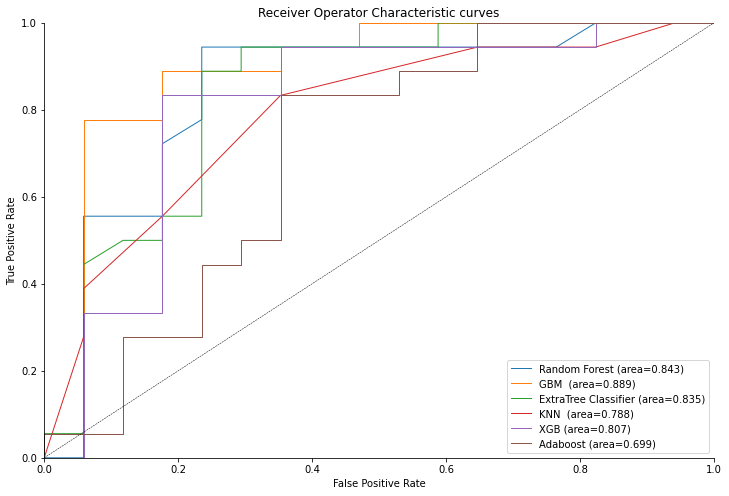

In [115]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test5,rf_ent5.predict_proba(X_test5),label='Random Forest',l='-')
roc_auc_plot(y_test5,gbm5.predict_proba(X_test5),label='GBM ',l='-')
roc_auc_plot(y_test5,et_100_5.predict_proba(X_test5),label='ExtraTree Classifier',l='-')
roc_auc_plot(y_test5,knn5.predict_proba(X_test5),label='KNN ',l='-')
roc_auc_plot(y_test5,xgb5.predict_proba(X_test5),label='XGB',l='-')
roc_auc_plot(y_test5,ada5.predict_proba(X_test5),label='Adaboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall Curve of Top Performing Models - Combined

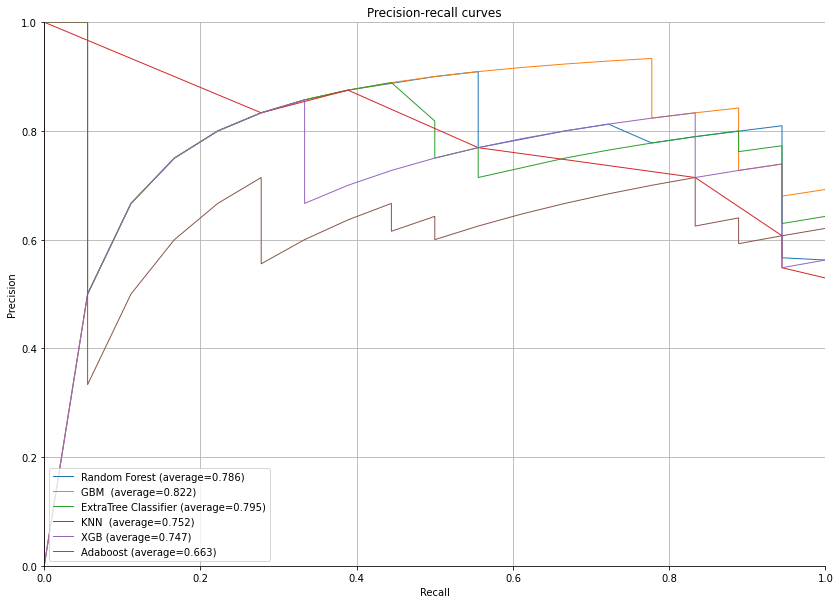

In [116]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test5,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test5, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test5,rf_ent5.predict_proba(X_test5),label='Random Forest',l='-')
precision_recall_plot(y_test5,gbm5.predict_proba(X_test5),label='GBM ',l='-')
precision_recall_plot(y_test5,et_100_5.predict_proba(X_test5),label='ExtraTree Classifier',l='-')
precision_recall_plot(y_test5,knn5.predict_proba(X_test5),label='KNN ',l='-')
precision_recall_plot(y_test5,xgb5.predict_proba(X_test5),label='XGB',l='-')
precision_recall_plot(y_test5,ada5.predict_proba(X_test5),label='Adaboost',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Importance

<AxesSubplot:>

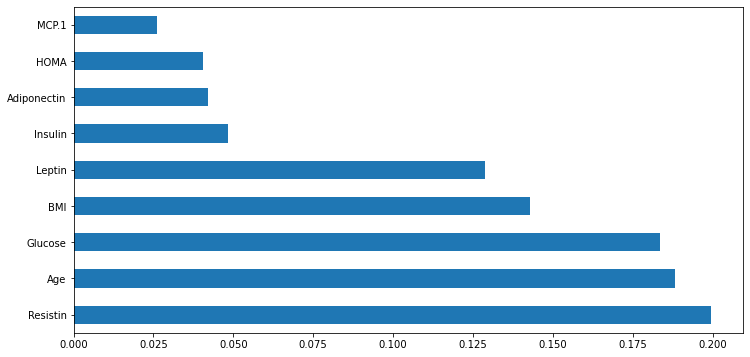

In [117]:
feat_importances = pd.Series(gbm5.feature_importances_, index=X_train5.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(12,6))

# Conclusion:
    
    
Again an ensemble machine learning algorithms resulted in higher performance than other model.

The top 5 features include: i) Resistin, ii) Glucose, iii) Age, iv) BMI and v) Leptin.